# Assignment 2: EDA and Feature Engineering - Loan Deafult

Submitted by-

#### Harsh Dhanuka, hd2457

### Import the packages, and read the dataset

In [1]:
# Import all packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy
import time
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
import missingno as msno


from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

In [2]:
# Read the data

df = pd.read_csv('/Users/harshdhanuka/Desktop/Columbia Class Matter/SEM 3/5420 Anomaly Detection/Assignment 2 EDA/XYZloan_default_selected_vars.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [3]:
print("Number of rows and columns in the dataset:")

df.shape

Number of rows and columns in the dataset:


(80000, 89)

In [4]:
print("Basic statistics of the columns are as follows:")

# Check basic statistics
df.describe()

Basic statistics of the columns are as follows:


,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


# 1. Initial Data Cleanup, NA's, Data Time, etc.

### a. Basic EDA of one variable `AP006`

h5         44246
ios        17159
android    17140
api         1455
Name: AP006, dtype: int64

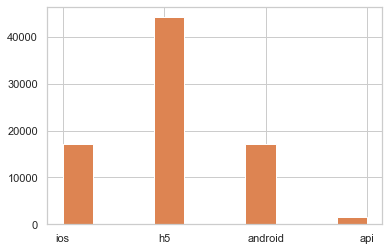

In [5]:
df['AP006'].hist()
df.AP006.hist()
df['AP006'].value_counts()

### b. Basic EDA of the target variable `loan_default`

The number of 0's and 1's are:
0    64512
1    15488
Name: loan_default, dtype: int64


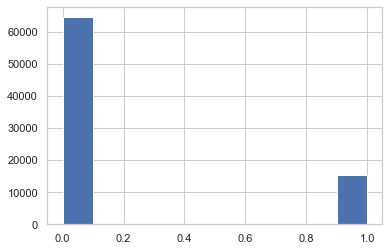

In [6]:
# Check the target variable column
print("The number of 0's and 1's are:")
print(df['loan_default'].value_counts())

df['loan_default'].hist()

### c. Check column names

In [7]:
# Check column names
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

### d. Check the column data types 

In [8]:
print(df.dtypes)

Unnamed: 0        int64
Unnamed: 0.1      int64
id                int64
loan_default      int64
AP001             int64
                 ...   
CD170           float64
CD172           float64
CD173           float64
MB005           float64
MB007            object
Length: 89, dtype: object


In [9]:
# Also check the general non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 89 columns):
Unnamed: 0      80000 non-null int64
Unnamed: 0.1    80000 non-null int64
id              80000 non-null int64
loan_default    80000 non-null int64
AP001           80000 non-null int64
AP002           80000 non-null int64
AP003           80000 non-null int64
AP004           80000 non-null int64
AP005           80000 non-null object
AP006           80000 non-null object
AP007           80000 non-null int64
AP008           80000 non-null int64
AP009           80000 non-null int64
TD001           80000 non-null int64
TD002           80000 non-null int64
TD005           80000 non-null int64
TD006           80000 non-null int64
TD009           80000 non-null int64
TD010           80000 non-null int64
TD013           80000 non-null int64
TD014           80000 non-null int64
TD015           80000 non-null int64
TD022           60402 non-null float64
TD023           72337 non-null float

### e. Feature considerations from eyeballing the data types

1. The first 3 variables are ID columns, cannot be used for predictions.
`Unnamed: 0`, `Unnamed: 0.1` and `id`. 

They need to be dropped.

2. `AP005` is a Date-Time column, which cannot be used for any predictions in the model. Date-Time columns act as an ID column and all have unique values, which misrepresents the variable while making predictions. The reason is that this field almost becomes a unique identifier for each record. It is as if you employ the ‘id’ field in your decision trees. 

I will derive year, month, day, weekday, etc. from this field. In some models, you may use ‘year’ as a variable just to explain any special volatility in the past. But you will never use the raw DateTime field as a predictor.
 
3. The following columns have 0 as their value in all entries, and hence, they need to be removed from any model predictions. 

`TD025`, `TD026`, `TD027`, `TD028`, `CR012`.

4. The following columns have the same value in all entries, and hence, they need to be removed from any model predictions.

`TD029`, `TD044`, `TD048`, `TD051`, `TD054`, `TD055`, `TD061`, `TD062`.

5. Check for categorical fields from the data variable descriptions. Convert the relevant numeric fields to their respective categorical fields:

`AP003`Education Code,
`AP004`Loan Term,
`AP006`OS Type,
`AP007`Application City Level,
`AP006`Flag if City not Application City,
`AP009` Binary format,
`MB007` Mobile Brands/type

### f. Convert the DateTime column `AP005` to the relevant formats of Year, Month, Day.

In [10]:
df['AP005'] =  pd.to_datetime(df['AP005'])

In [11]:
df['Loan_app_day_name'] = df['AP005'].dt.day_name()
df['Loan_app_month'] = df['AP005'].dt.month_name()
df['Loan_app_time'] = df['AP005'].dt.time
df['Loan_app_day'] = df['AP005'].dt.day

In [12]:
# Drop old column

df = df.drop(columns = ['AP005']) 
df.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP006,AP007,...,CD169,CD170,CD172,CD173,MB005,MB007,Loan_app_day_name,Loan_app_month,Loan_app_time,Loan_app_day
0,0,1,1,1,31,2,1,12,ios,3,...,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7,Thursday,July,10:21:00,6
1,1,2,2,0,27,1,1,12,h5,5,...,-99.0,-99.0,-99.0,-99.0,NaN,WEB,Thursday,April,12:51:00,6
2,2,3,3,0,33,1,4,12,h5,4,...,33.0,0.0,143.0,110.0,8.0,WEB,Saturday,July,14:11:00,1
3,3,4,4,0,34,2,4,12,android,5,...,0.0,0.0,0.0,0.0,10.0,OPPO,Friday,July,10:10:00,7
4,4,5,5,0,47,2,1,12,h5,4,...,-99.0,-99.0,-99.0,-99.0,NaN,WEB,Thursday,July,14:37:00,6


### g. Convert the misrepresented numerical categorical variables back to relevant category format

In [13]:
#df["AP003"] = df["AP003"].astype('object')
#df["AP004"] = df["AP004"].astype('object')
df["AP006"] = df["AP006"].astype('object')
#df["AP007"] = df["AP007"].astype('object')
#df["AP008"] = df["AP008"].astype('object')
#df["AP009"] = df["AP009"].astype('object')

df["MB007"] = df["MB007"].astype('object')

df['Loan_app_day_name'] = df['Loan_app_day_name'].astype('object')
df['Loan_app_month'] = df['Loan_app_month'].astype('object')
df['Loan_app_time'] = df['Loan_app_time'].astype('object')
df['Loan_app_day'] = df['Loan_app_day'].astype('object')

### h. Drop all blank value/id columns

In [14]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'id', 'TD025', 'TD026', 'TD027', 'TD028', 'CR012','TD029', 'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062']) 
df.head()

,loan_default,AP001,AP002,AP003,AP004,AP006,AP007,AP008,AP009,TD001,...,CD169,CD170,CD172,CD173,MB005,MB007,Loan_app_day_name,Loan_app_month,Loan_app_time,Loan_app_day
0,1,31,2,1,12,ios,3,3,1,1,...,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7,Thursday,July,10:21:00,6
1,0,27,1,1,12,h5,5,4,0,2,...,-99.0,-99.0,-99.0,-99.0,NaN,WEB,Thursday,April,12:51:00,6
2,0,33,1,4,12,h5,4,2,0,2,...,33.0,0.0,143.0,110.0,8.0,WEB,Saturday,July,14:11:00,1
3,0,34,2,4,12,android,5,5,0,0,...,0.0,0.0,0.0,0.0,10.0,OPPO,Friday,July,10:10:00,7
4,0,47,2,1,12,h5,4,4,1,2,...,-99.0,-99.0,-99.0,-99.0,NaN,WEB,Thursday,July,14:37:00,6


### i. Convert all the negative or mis-read values to 'nan' for imputation.

As per all the variable description, all the following columns are either counts, lengths, or days. Hence, the negative values such as -999, -99, -98, -1, etc are all mis-read NA's and need to be converted back to 'nan' format.

In [15]:
features_nan = ['AP001', 'AP002',
                'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010',
       'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005',
       'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'PA028',
       'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088',
       'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115',
       'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132',
       'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162',
       'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'MB005']

In [16]:
# Define a function to convert negatives to nan

def convert_to_nan(var):
    df[var][df[var] < 0] = np.nan

In [17]:
for i in features_nan:
    convert_to_nan(i)

In [18]:
# Verify that the negatives are gone

print("The minimum now stands at 0 for most of the columns")

df[features_nan].describe()

The minimum now stands at 0 for most of the columns


,AP001,AP002,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,...,76312.000000,76312.000000,76312.000000,76312.000000,76312.000000,76312.000000,76312.000000,76312.000000,76312.000000,77207.000000
mean,31.706913,1.321813,1.986962,0.706213,3.593037,1.345700,5.40600,2.020812,6.804737,2.603662,...,11.501677,19.180352,16.573750,952.775121,850.212037,1812.070212,1610.332071,2626.427993,2330.516878,5.976272
std,7.075070,0.467174,1.807445,0.918347,2.799570,1.413362,4.02311,1.973988,5.128183,2.505840,...,17.641851,30.743372,24.496918,1392.729146,1256.936168,2463.242747,2191.780118,3433.330482,3029.857757,3.641814
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.00000,1.000000,3.000000,1.000000,...,3.000000,6.000000,5.000000,123.000000,76.000000,382.000000,294.000000,649.000000,512.000000,3.000000
50%,30.000000,1.000000,2.000000,0.000000,3.000000,1.000000,4.00000,2.000000,6.000000,2.000000,...,7.000000,13.000000,11.000000,518.000000,437.000000,1098.000000,940.000000,1658.000000,1423.000000,5.000000
75%,35.000000,2.000000,3.000000,1.000000,5.000000,2.000000,7.00000,3.000000,9.000000,4.000000,...,14.000000,24.000000,21.000000,1258.000000,1123.000000,2369.000000,2107.000000,3417.000000,3037.000000,8.000000
max,56.000000,2.000000,20.000000,11.000000,24.000000,21.000000,46.00000,35.000000,52.000000,43.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.000000,125352.000000,87312.000000,47.000000


### j. Fill the NA's

Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

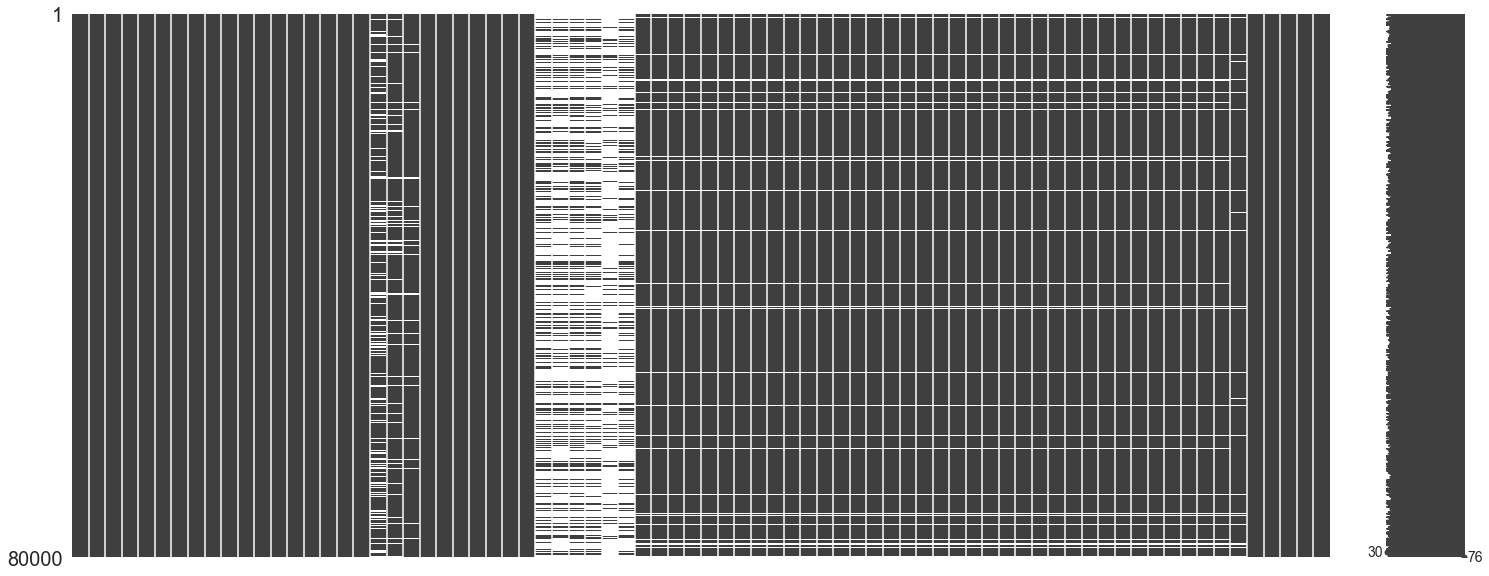

In [19]:
# Check the NA's

msno.matrix(df)
plt.show()

Seems like there is a heavy number of NA's in the data.

### Instead of using the traditional simple mean, median or mode method of imputation, I will be using the smart method of Iterative Imputation from sklearn package.
The documentation is here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [20]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

#### Make a subset of the original df with only the numeric/float64  variables which have the NA's

In [21]:
df_2 = df[features_nan]

In [22]:
# Verify

df_2.head()

,AP001,AP002,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
0,31,2,1,1,4,1,5,1,14,2,...,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0
1,27,1,2,0,3,1,3,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33,1,2,1,4,1,5,1,9,1,...,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0
3,34,2,0,0,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,47,2,2,0,2,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#df_2.info()

### 1. Method 1:   'MEAN' imputation through iterative imputer

In [24]:
#imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
#                                 max_iter=10, tol=0.001, 
#                                 n_nearest_features=None, initial_strategy='mean')
#imp.fit(df_2)

In [25]:
#imputed_data_mean = pd.DataFrame(data=imp.transform(df_2), 
#                             columns=['TD022', 'TD023', 'TD024', 'PA022',
#       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
#       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
#       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
#       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
#       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
#       'CD173', 'MB005'],
#                             dtype='int')

In [26]:
#imputed_data_mean.head()

### 2. Method 2:  'MEDIAN' imputation through iterative imputer

In [27]:
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=None, initial_strategy='median')
imp.fit(df_2)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='median',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, tol=0.001, verbose=0)

In [28]:
imputed_data_median = pd.DataFrame(data=imp.transform(df_2), 
                             columns=['AP001', 'AP002', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010',
       'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005',
       'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'PA028',
       'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088',
       'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115',
       'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132',
       'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162',
       'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'MB005'],
                             dtype='int')

In [29]:
imputed_data_median.head()

,AP001,AP002,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
0,31,2,1,1,4,1,5,1,14,2,...,8,13,13,0,0,1449,1449,2249,2249,7
1,27,1,2,0,3,1,3,1,3,2,...,6,12,10,544,465,1088,931,1674,1438,5
2,33,1,2,1,4,1,5,1,9,1,...,0,3,2,33,0,33,0,143,110,8
3,34,2,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10
4,47,2,2,0,2,1,2,1,2,1,...,6,12,10,547,453,1093,921,1712,1454,9


### 3. Method 3:  'MODE' imputation through iterative imputer

In [30]:
#imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
#                                 max_iter=10, tol=0.001, 
#                                 n_nearest_features=None, initial_strategy='most_frequent')
#imp.fit(df_2)

In [31]:
#imputed_data_mode = pd.DataFrame(data=imp.transform(df_2), 
#                             columns=['TD022', 'TD023', 'TD024', 'PA022',
#       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
#       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
#       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
#       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
#       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
#       'CD173', 'MB005'],
#                             dtype='int')

In [32]:
#imputed_data_mode.head()

In [33]:
# Gives negative inputations, - avoid MODE.

### h. Convert the loan amount column `CR009` to a category variable and bin appropriately.

In [34]:
df['CR009'] = pd.cut(x=df['CR009'], bins=[-1, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1500000])
df = df.astype({'CR009':'object'})

In [35]:
df.CR009.value_counts()

(-1, 100000]          74142
(100000, 200000]       4125
(200000, 300000]        975
(300000, 400000]        353
(400000, 500000]        166
(500000, 600000]         95
(600000, 700000]         48
(700000, 800000]         32
(1000000, 1500000]       31
(800000, 900000]         19
(900000, 1000000]        14
Name: CR009, dtype: int64

# 2. EDA of variables and binning

### a. Check the Correlation - which is the relation between 2 or 3 variables -  using correlation plot

I will check this for the variables which are not direct counts or lengths or days.
The variables I use are the ones which are marked at `Credit Center` data.

I wont be using the other variables as they are all `Call detail` data. 

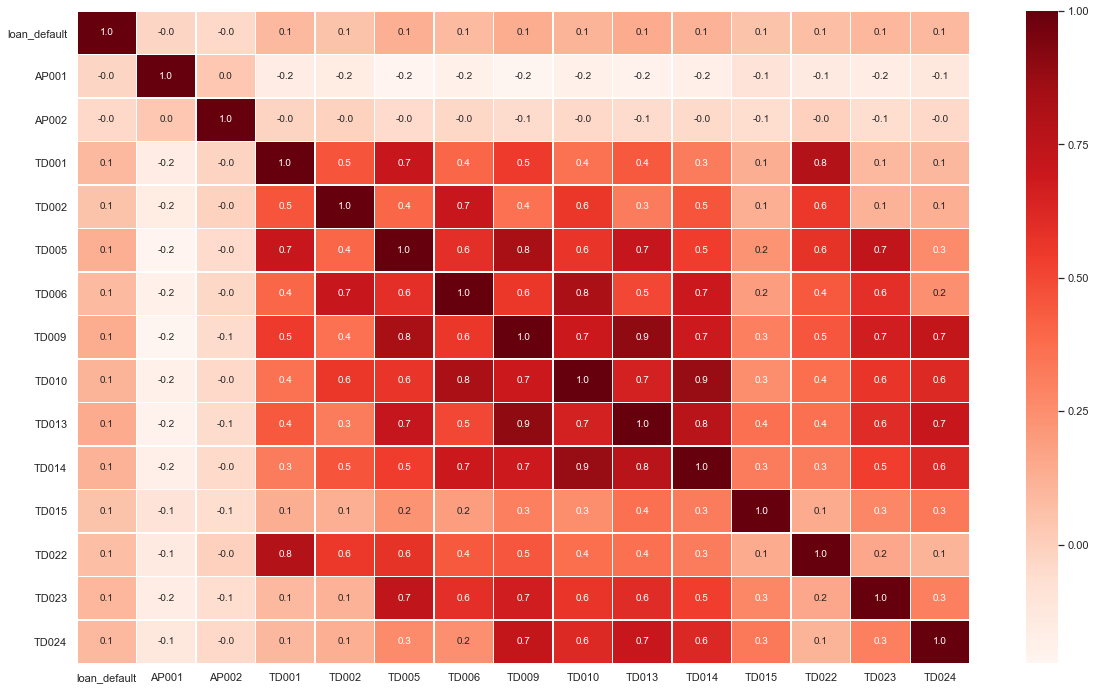

In [36]:
corr = df[['loan_default', 'AP001', 'AP002', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024']].corr()
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='Reds', linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

#### Check the correlations for the counts, lengths, and days columns

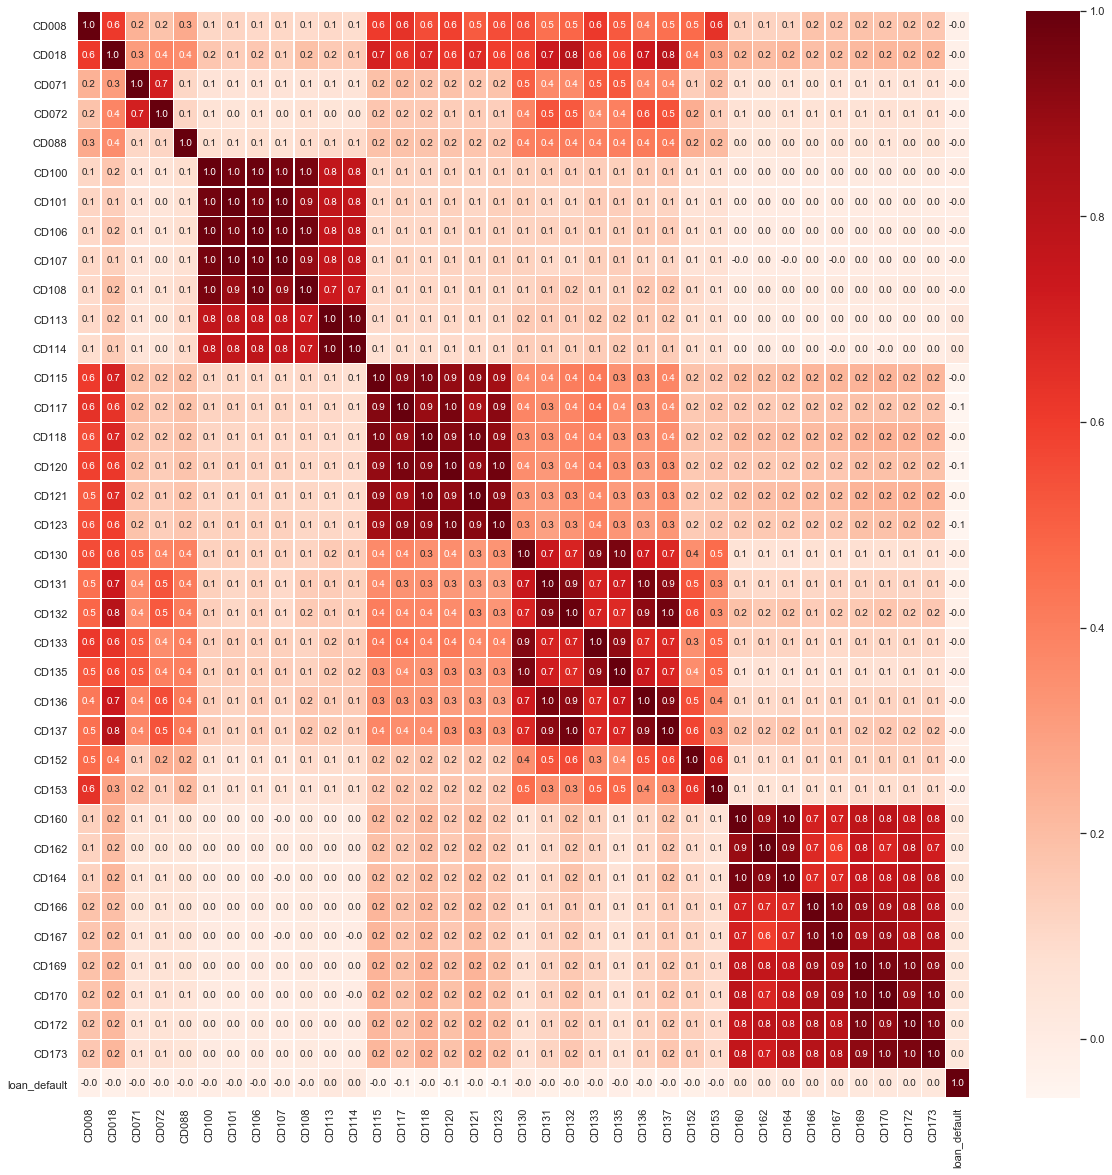

In [37]:
filter_col = [col for col in df if col.startswith('CD')]
filter_col.append('loan_default')
corr = df[filter_col].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='Reds', linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

### b. Create categorical variables using qcut, and assign function to bin all continuous variables.
### These are the raw data, not the NA imputed one.

* You may need to split a continuous variable into a categorial variable
* Notice how the NoData category is added for "NA".

In [38]:
df_bin = df.copy(deep = True)
df_bin.head()

,loan_default,AP001,AP002,AP003,AP004,AP006,AP007,AP008,AP009,TD001,...,CD169,CD170,CD172,CD173,MB005,MB007,Loan_app_day_name,Loan_app_month,Loan_app_time,Loan_app_day
0,1,31,2,1,12,ios,3,3,1,1,...,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7,Thursday,July,10:21:00,6
1,0,27,1,1,12,h5,5,4,0,2,...,NaN,NaN,NaN,NaN,NaN,WEB,Thursday,April,12:51:00,6
2,0,33,1,4,12,h5,4,2,0,2,...,33.0,0.0,143.0,110.0,8.0,WEB,Saturday,July,14:11:00,1
3,0,34,2,4,12,android,5,5,0,0,...,0.0,0.0,0.0,0.0,10.0,OPPO,Friday,July,10:10:00,7
4,0,47,2,1,12,h5,4,4,1,2,...,NaN,NaN,NaN,NaN,NaN,WEB,Thursday,July,14:37:00,6


In [39]:
# Write a function and loop through 
def binning(var):
    df_bin[var + '_bin'] = pd.qcut(df_bin[var],15,duplicates='drop').values.add_categories("NoData")
    df_bin[var + '_bin'] = df_bin[var + '_bin'].fillna("NoData").astype(str)
    df_bin[var + '_bin'].value_counts(dropna=False)

In [40]:
features = ['AP001', 'AP002', #'AP003', 'AP004', 'AP006', 'AP007',
       # 'AP008', 'AP009',
       'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010',
       'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005',
       #'CR009', 
       'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'PA028',
       'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088',
       'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115',
       'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132',
       'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162',
       'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'MB005'
       # 'MB007', 'Loan_app_day_name', 'Loan_app_month', 'Loan_app_time',
       # 'Loan_app_day'
           ]

In [41]:
for i in features:
    binning(i)

In [42]:
# View the bins of some variables 

print(df_bin['AP002_bin'].value_counts(dropna=False))
print(df_bin['TD001_bin'].value_counts(dropna=False))
print(df_bin['TD022_bin'].value_counts(dropna=False))

(0.999, 2.0]    80000
Name: AP002_bin, dtype: int64
(-0.001, 1.0]    33040
(1.0, 2.0]       22199
(2.0, 3.0]       12186
(3.0, 4.0]        6152
(5.0, 20.0]       3510
(4.0, 5.0]        2913
Name: TD001_bin, dtype: int64
(9.999, 15.0]    36564
NoData           19598
(15.0, 20.0]      9462
(25.0, 30.0]      8420
(20.0, 25.0]      5956
Name: TD022_bin, dtype: int64


### c. I will try to look at the distributions of the data, and the `% Y by X` which is the `mean` column for all the Numerical columns here.
#### This will help identify if mean or median is a better imputation for NA's and also help bin better manually.
#### Also, this will help in feature selection moving forward.

The 'mean' column represents the '% Y by X'.

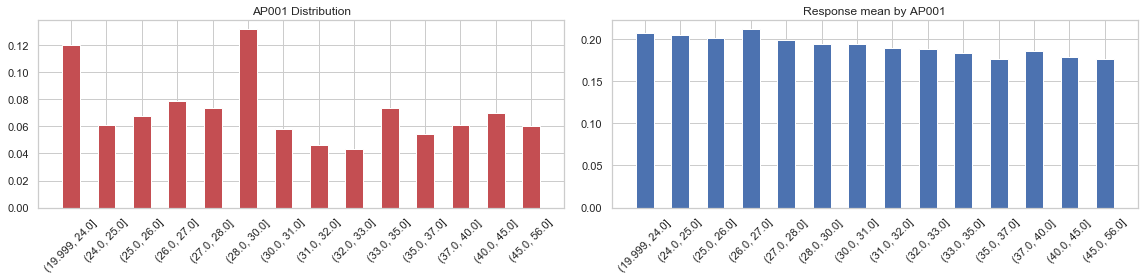

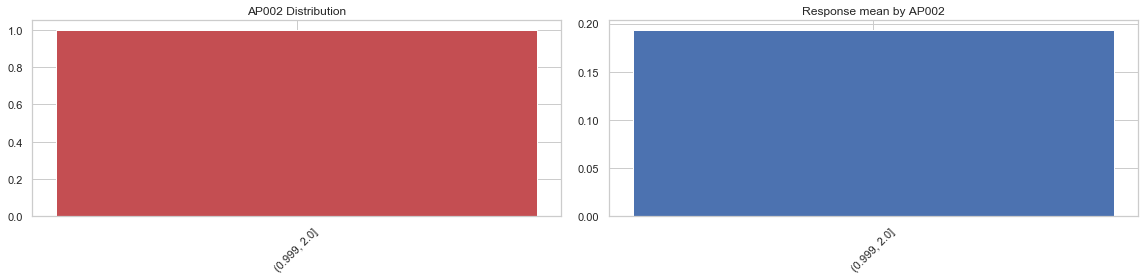

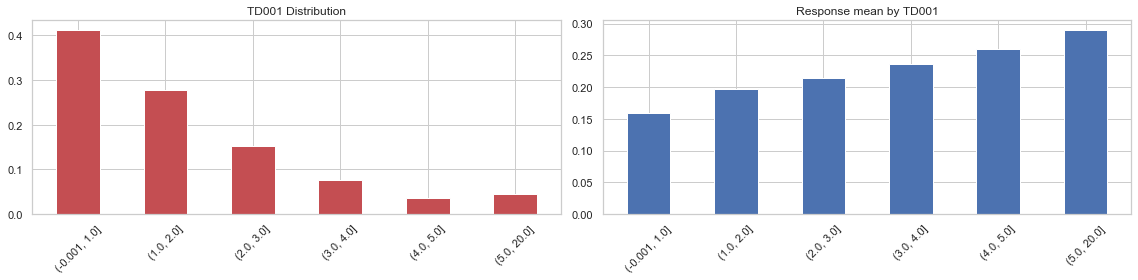

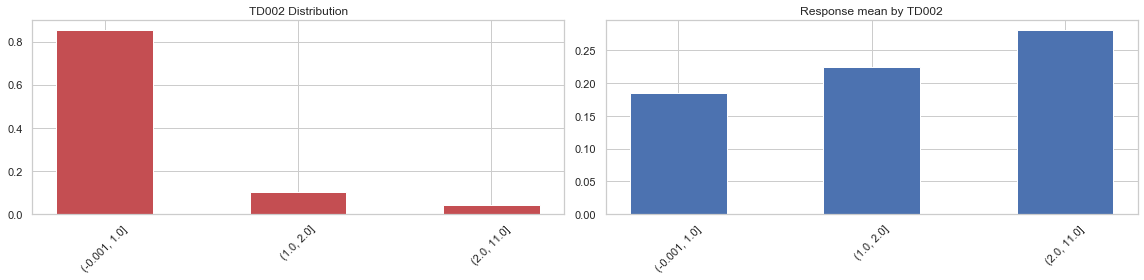

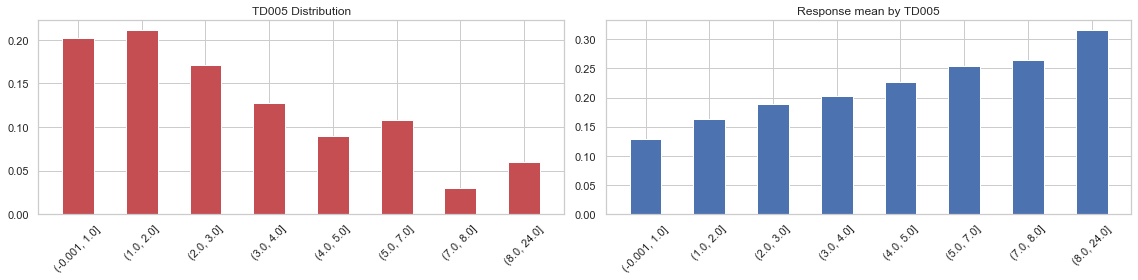

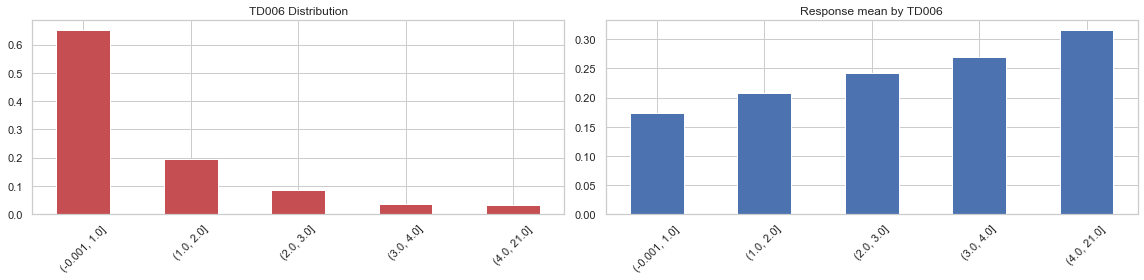

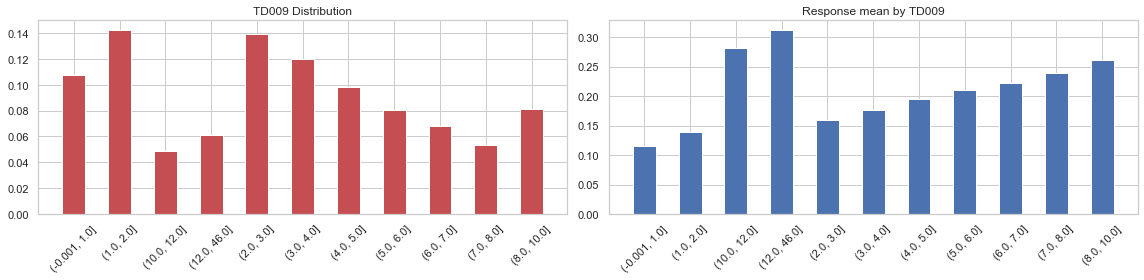

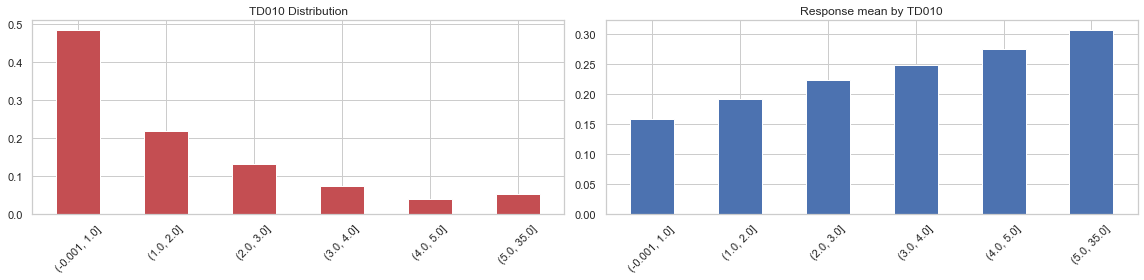

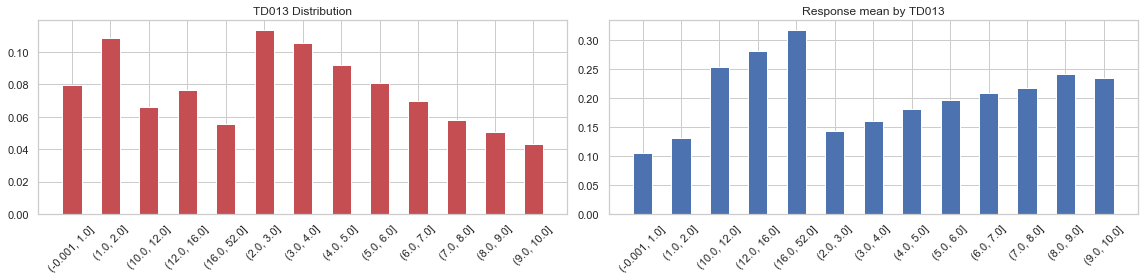

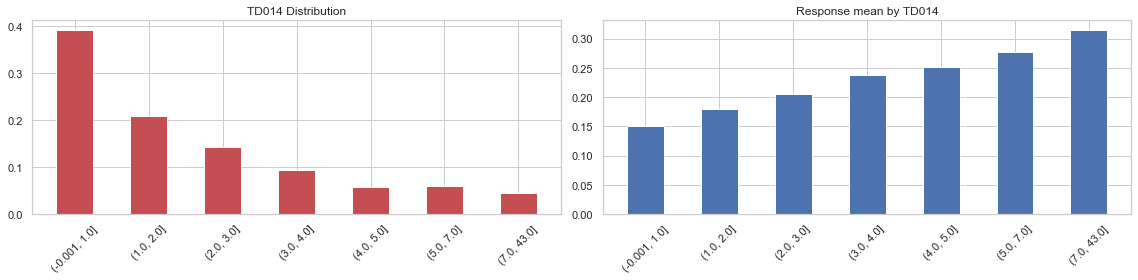

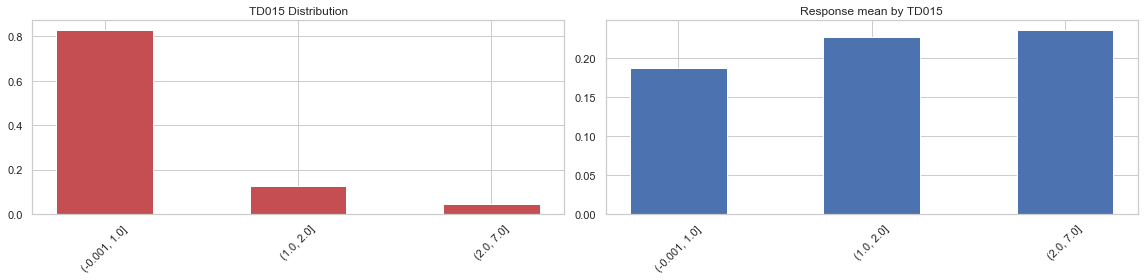

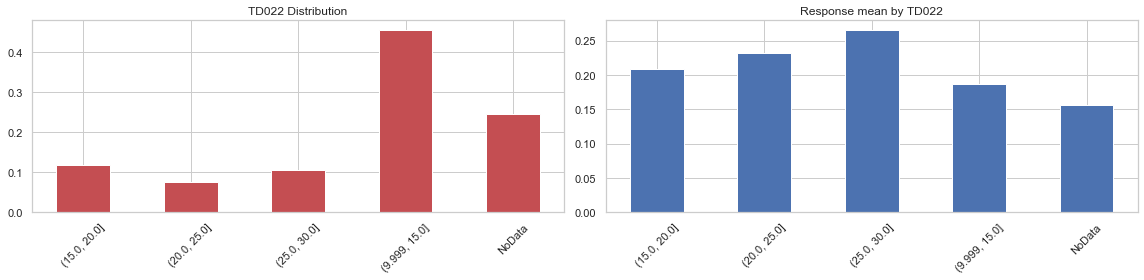

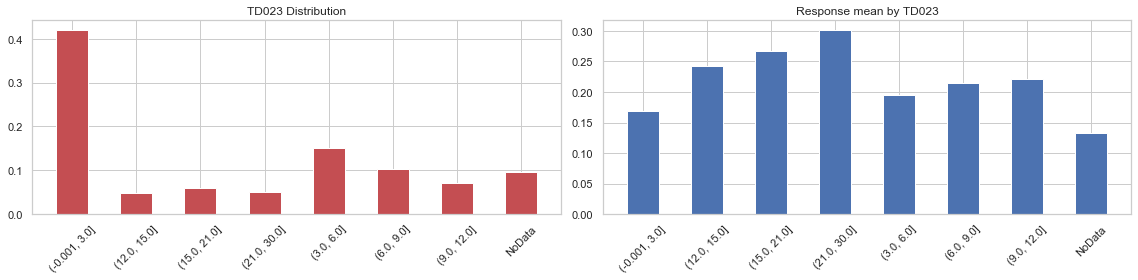

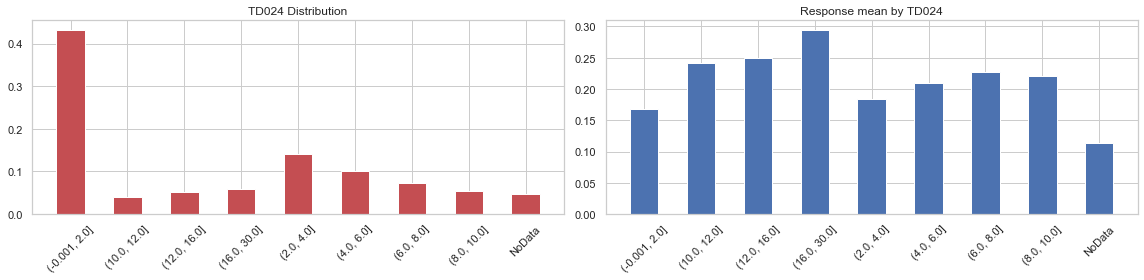

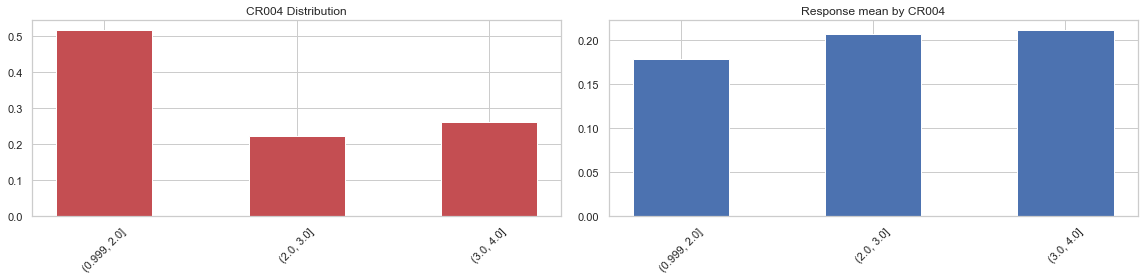

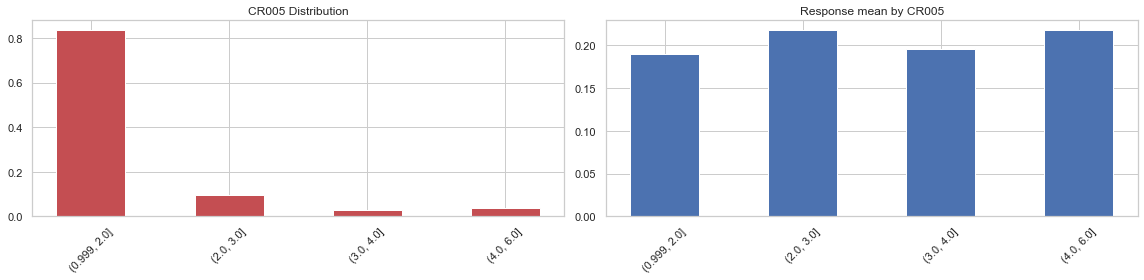

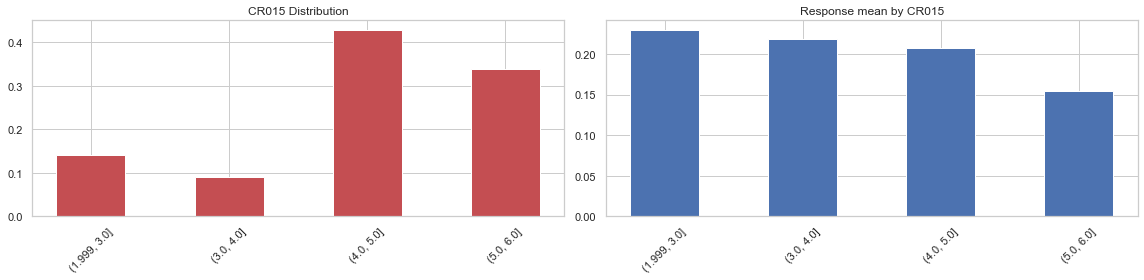

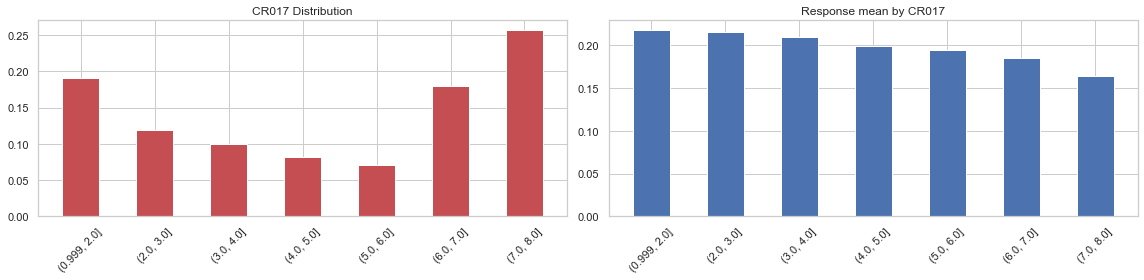

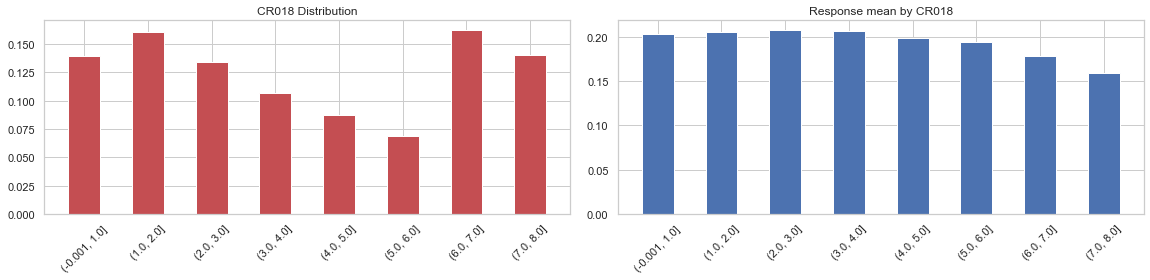

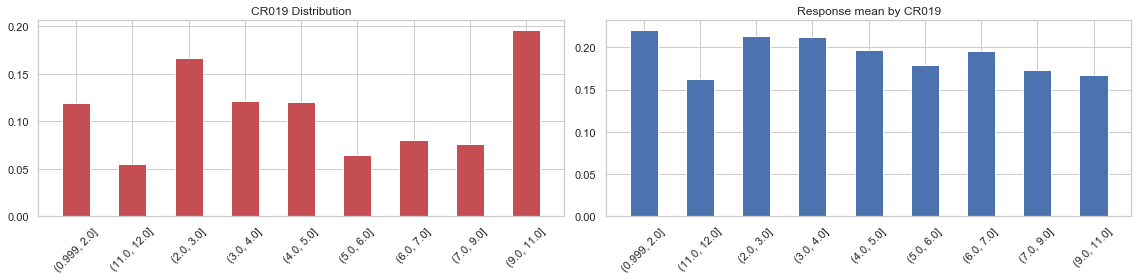

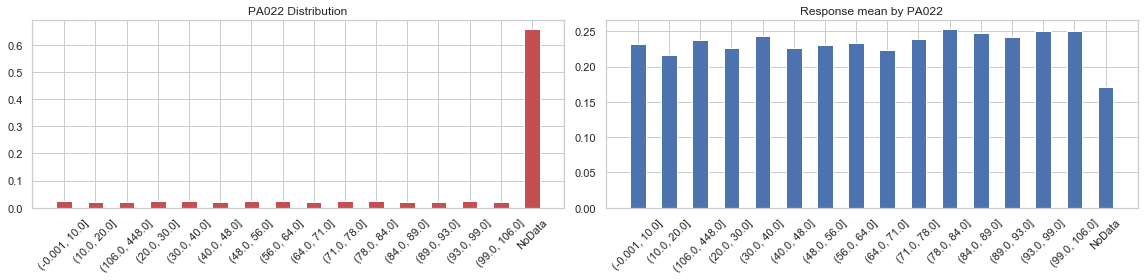

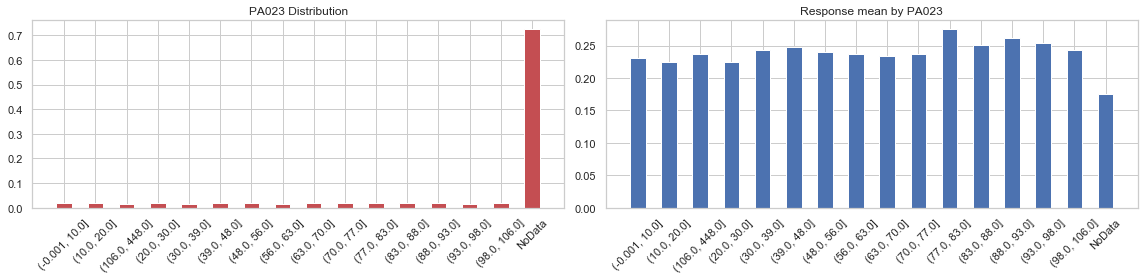

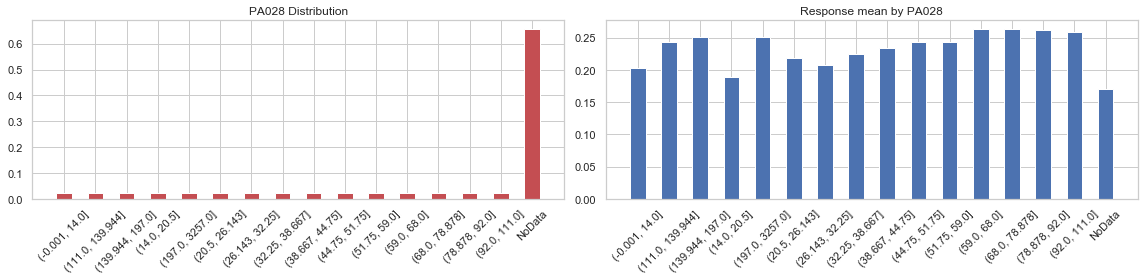

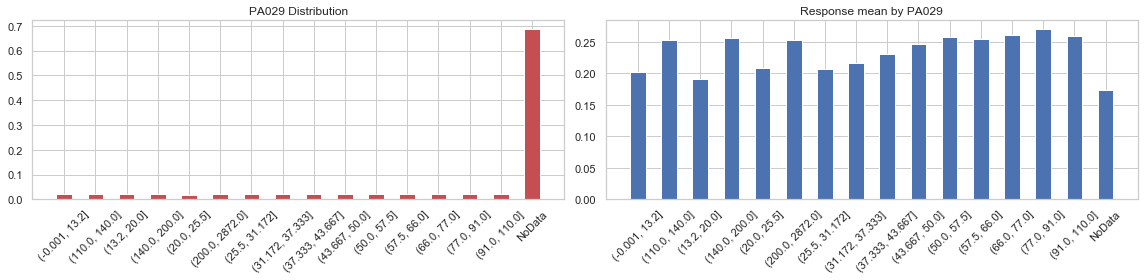

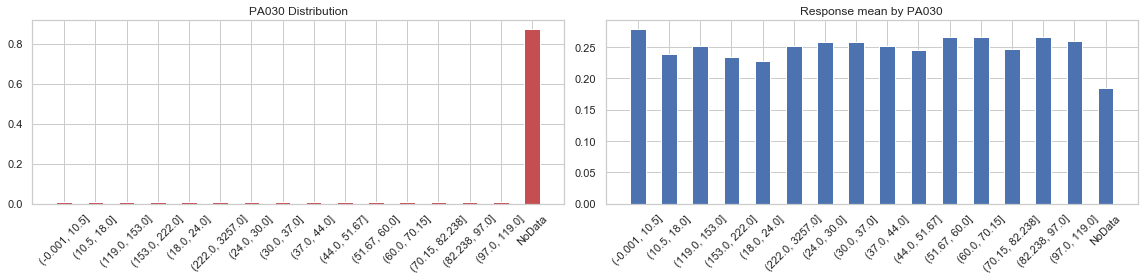

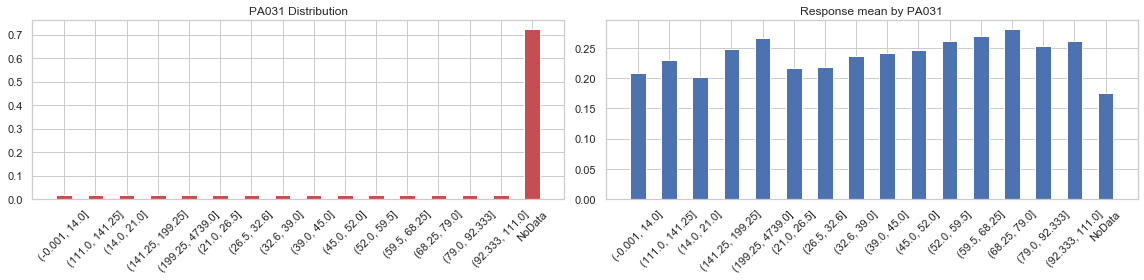

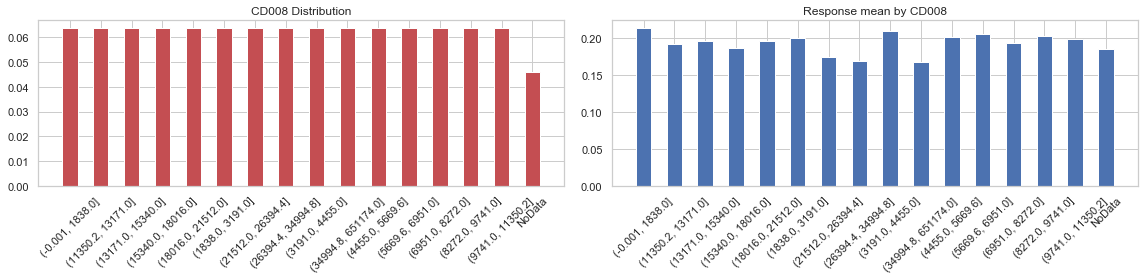

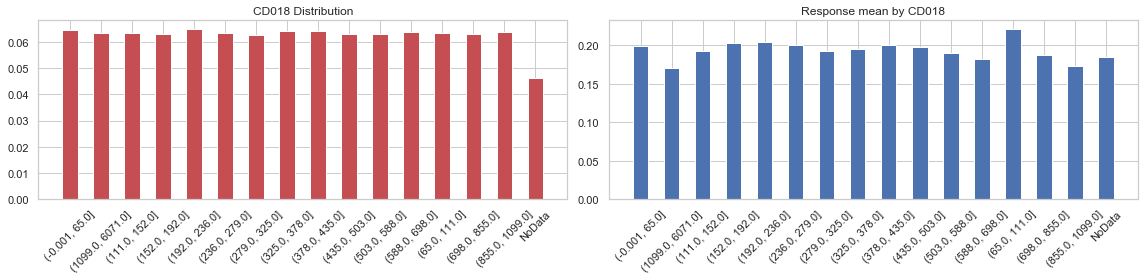

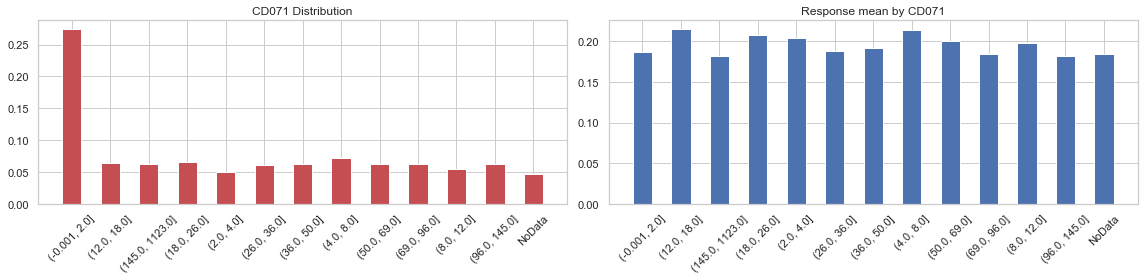

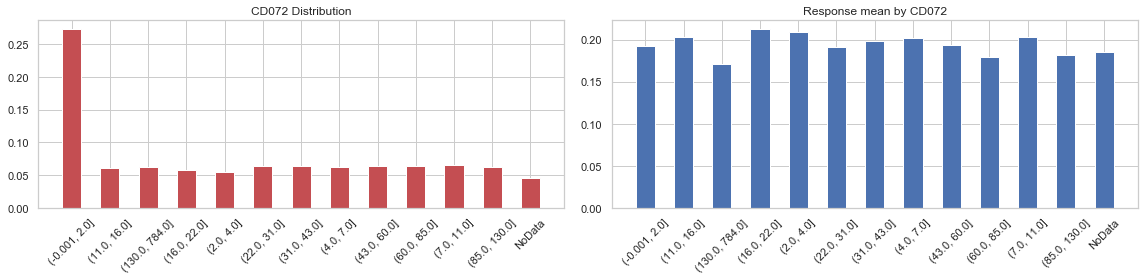

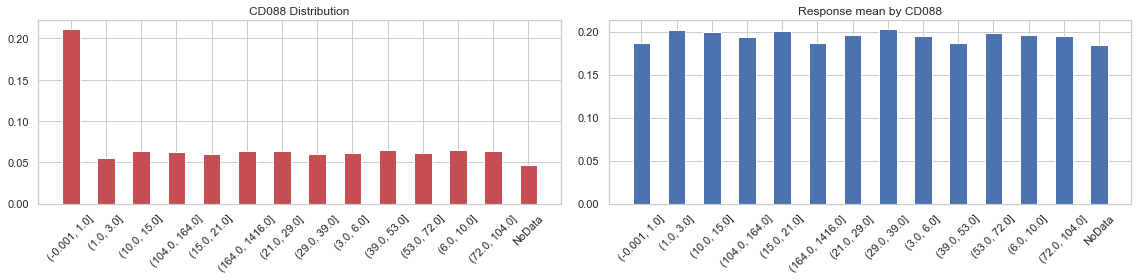

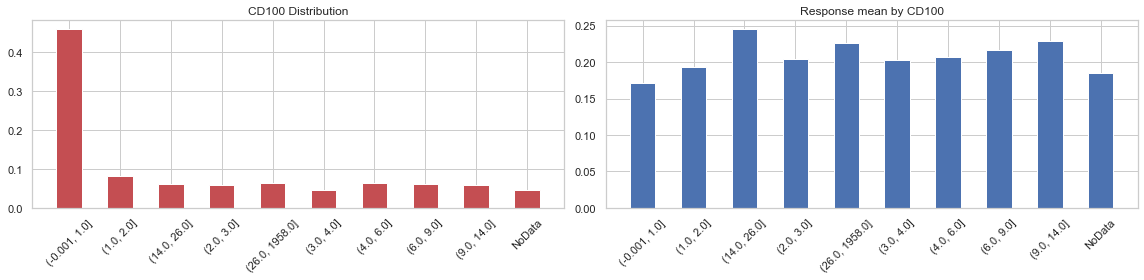

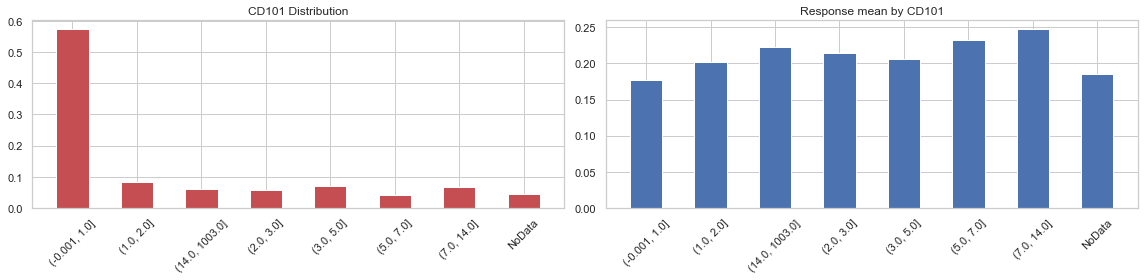

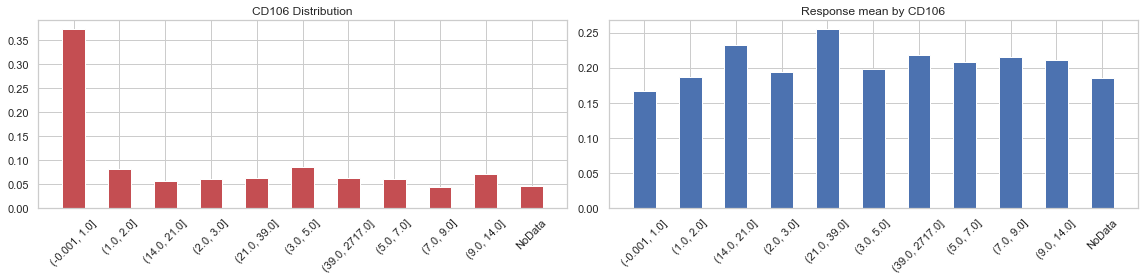

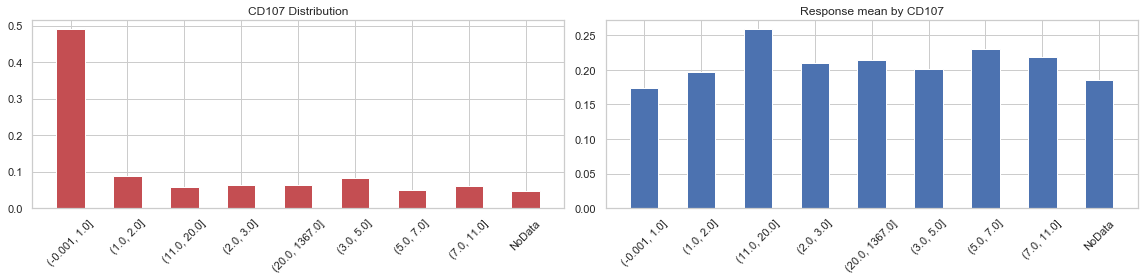

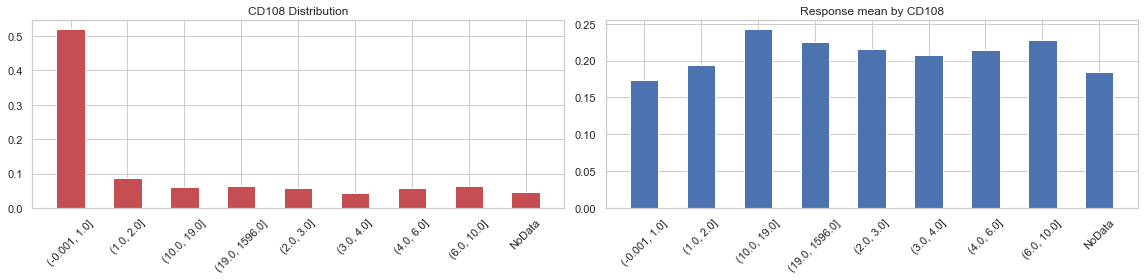

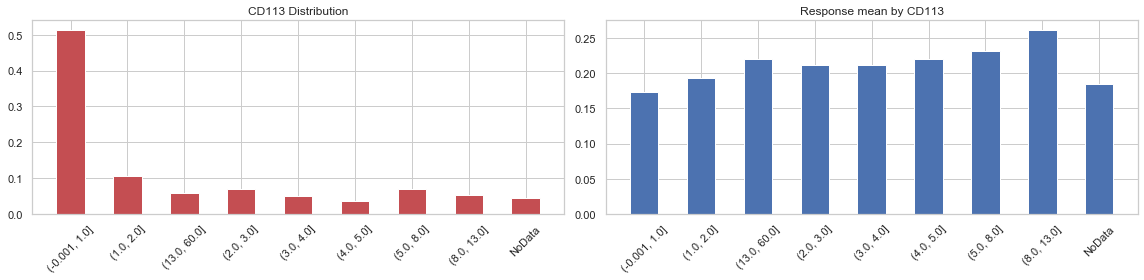

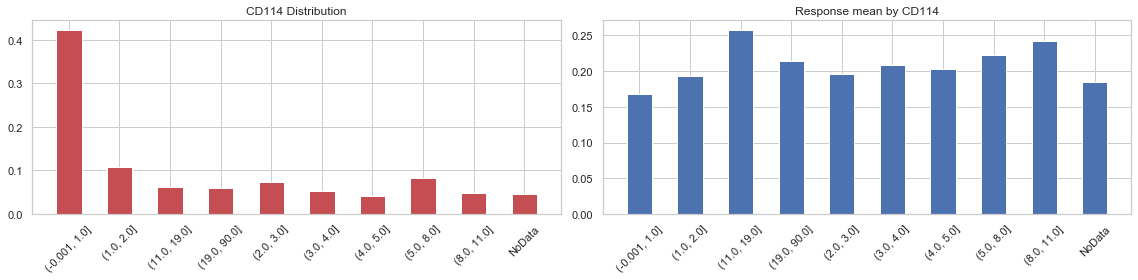

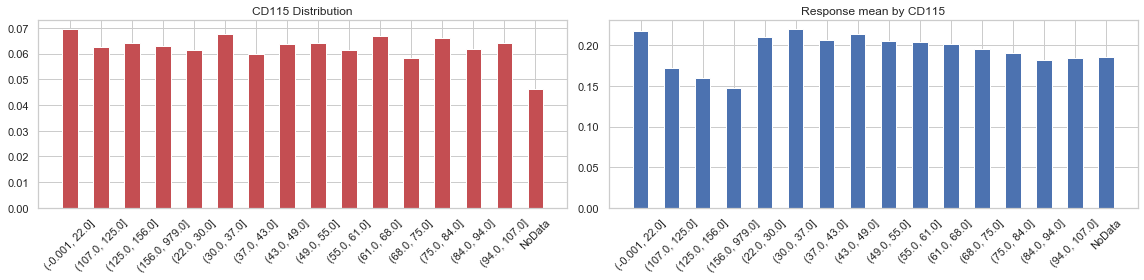

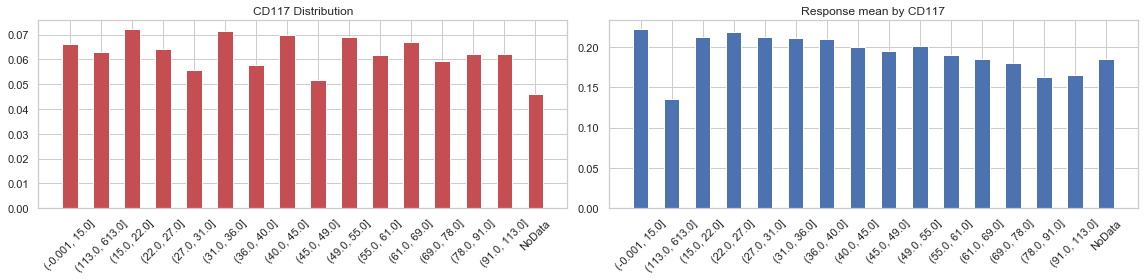

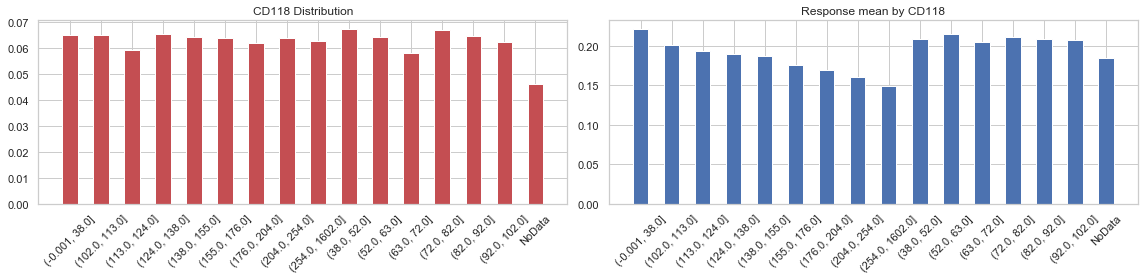

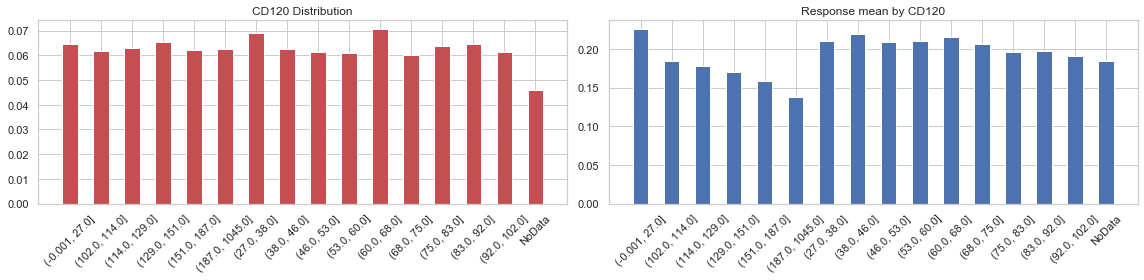

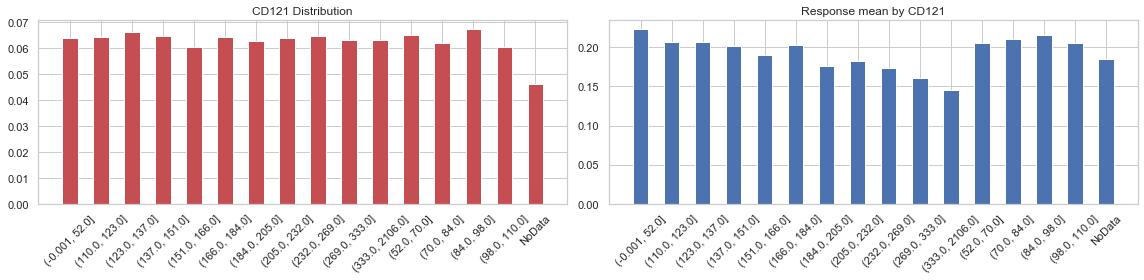

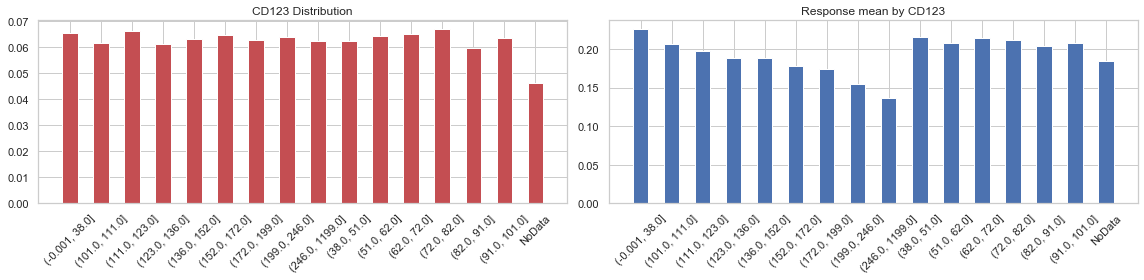

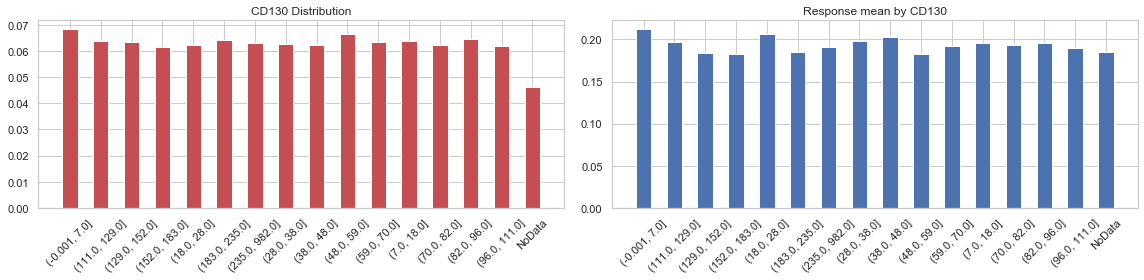

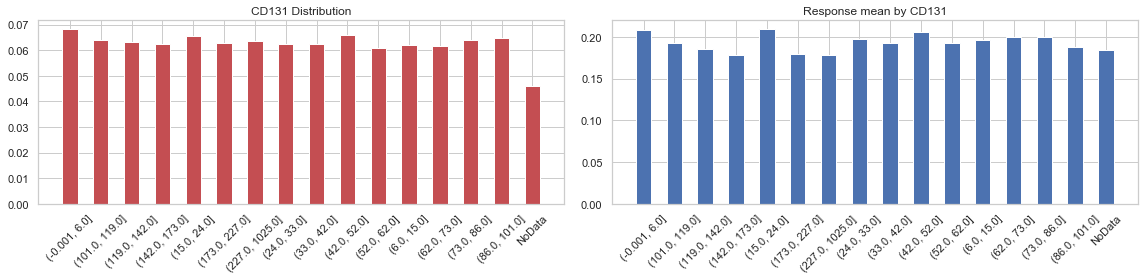

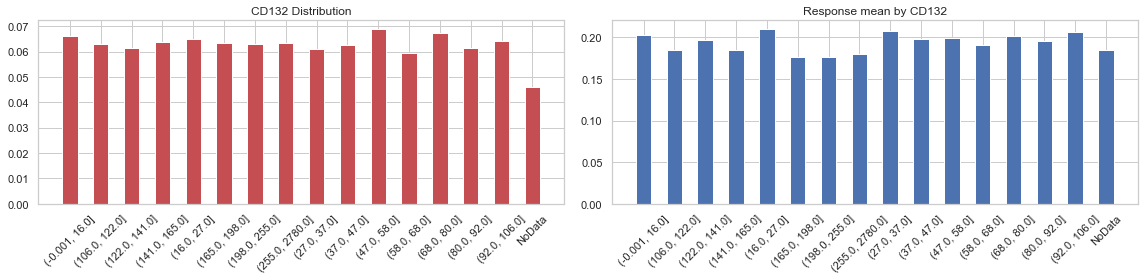

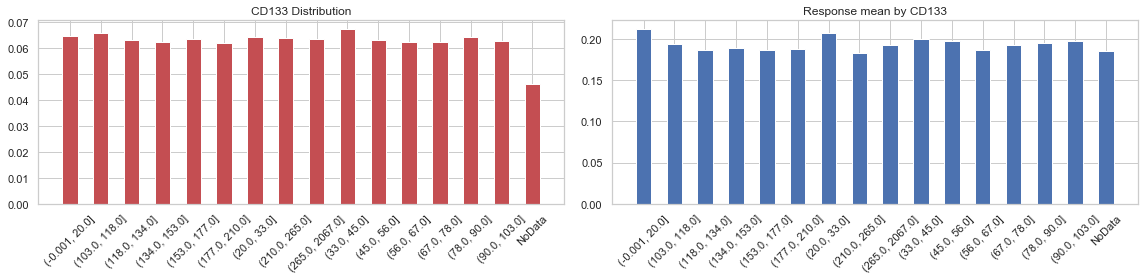

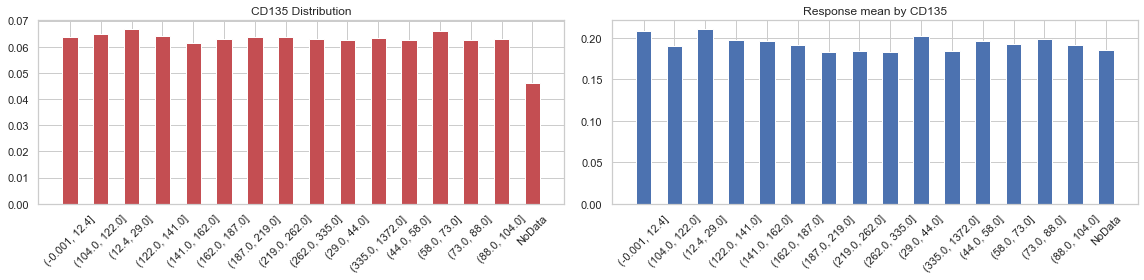

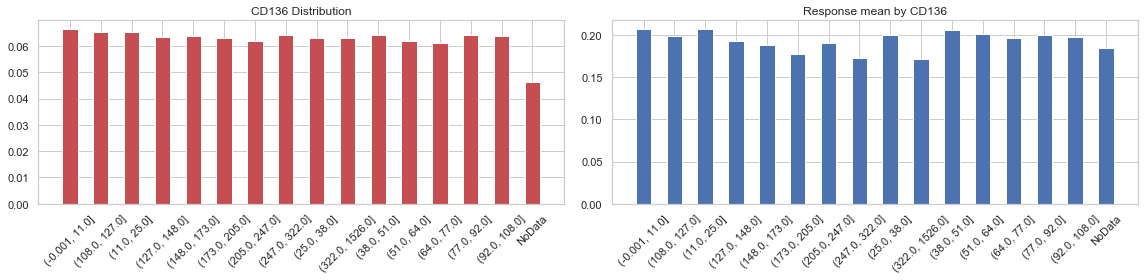

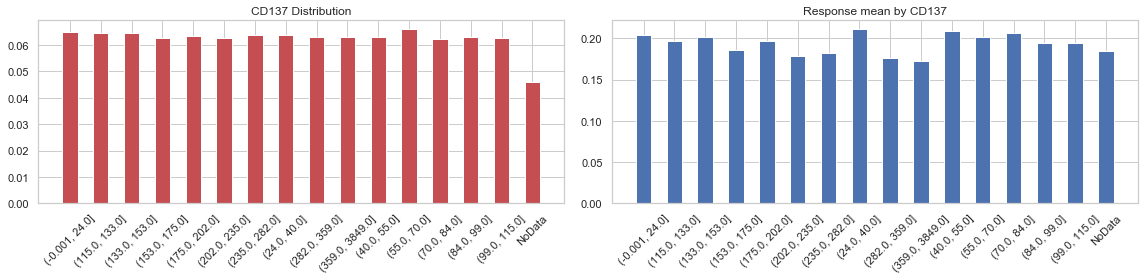

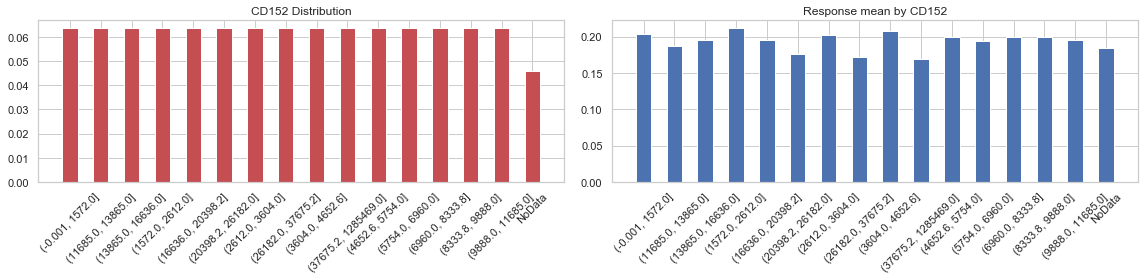

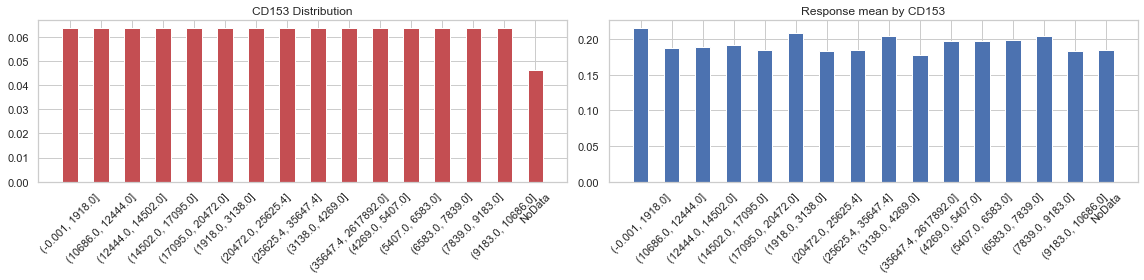

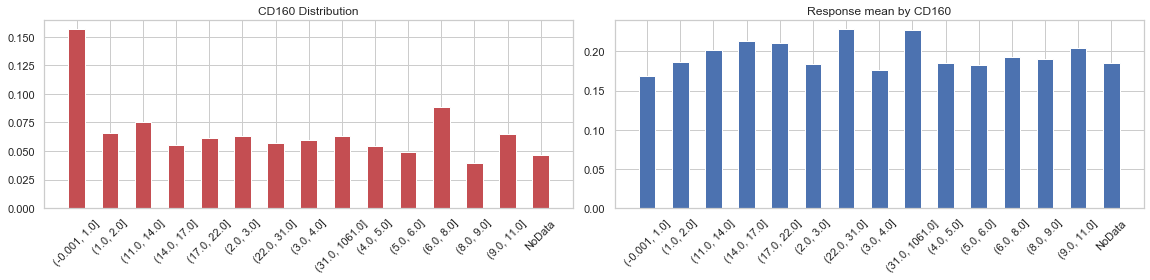

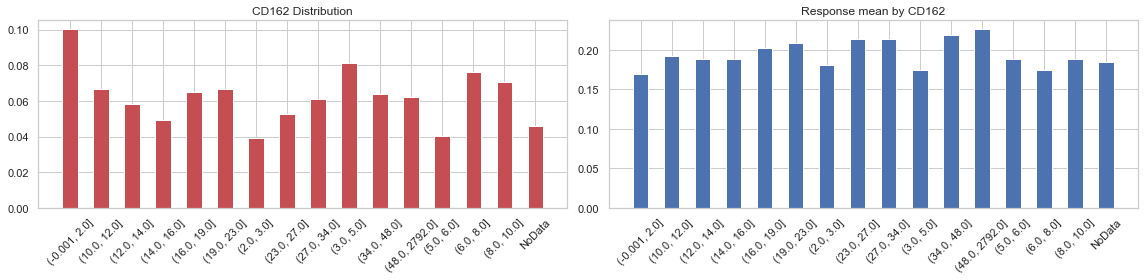

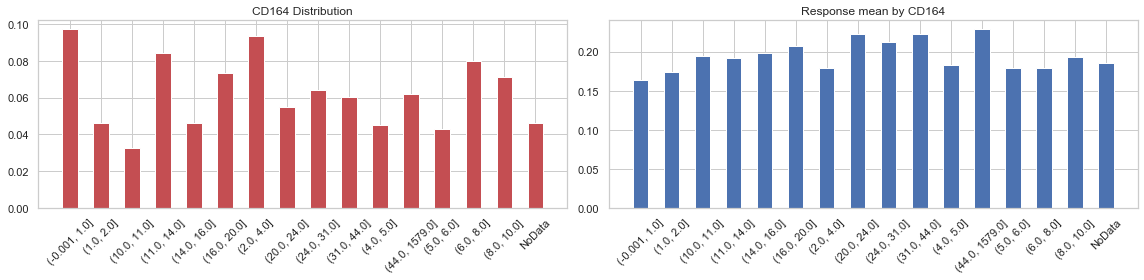

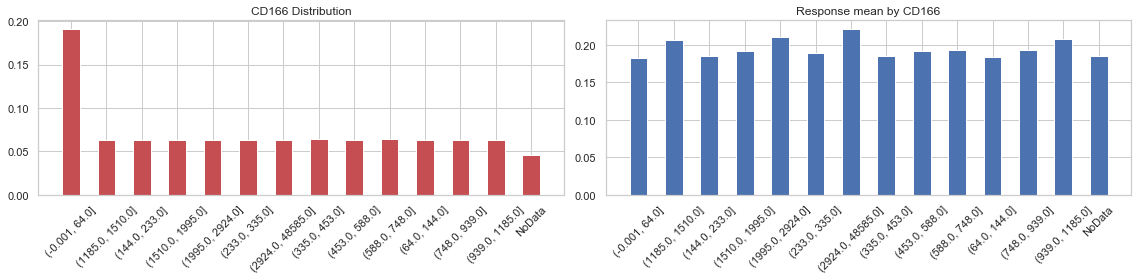

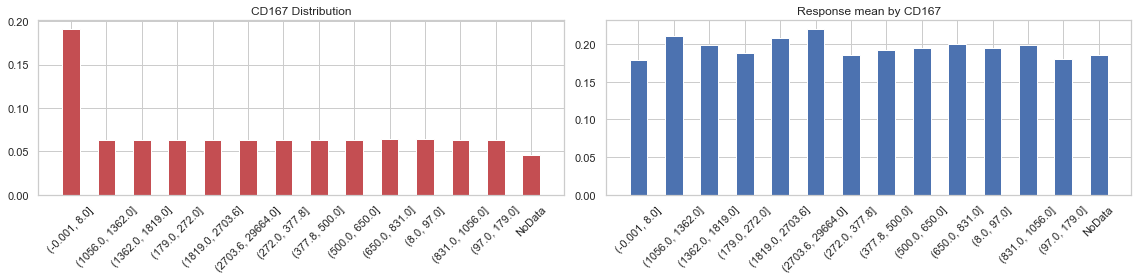

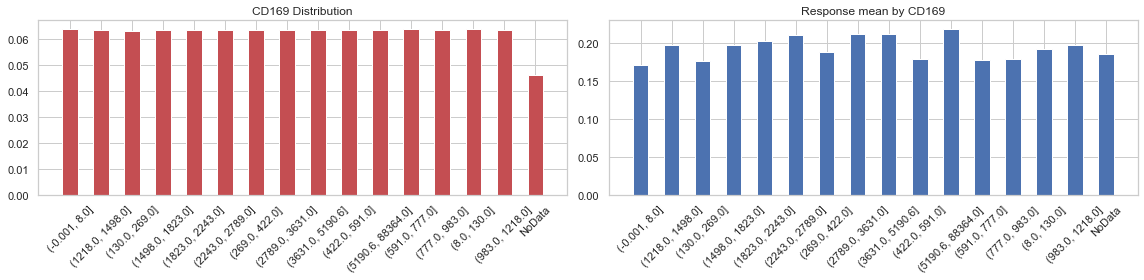

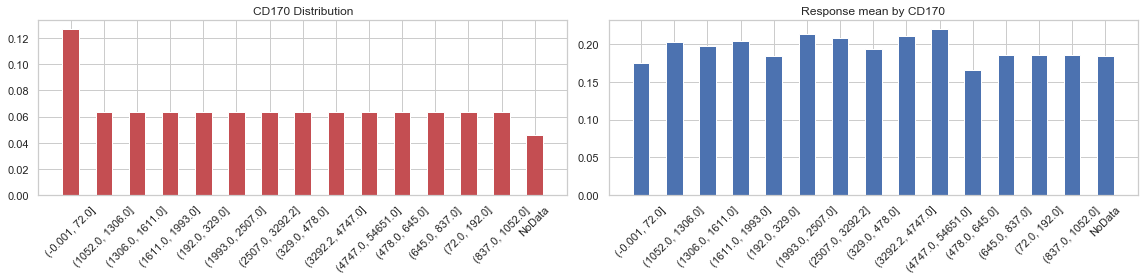

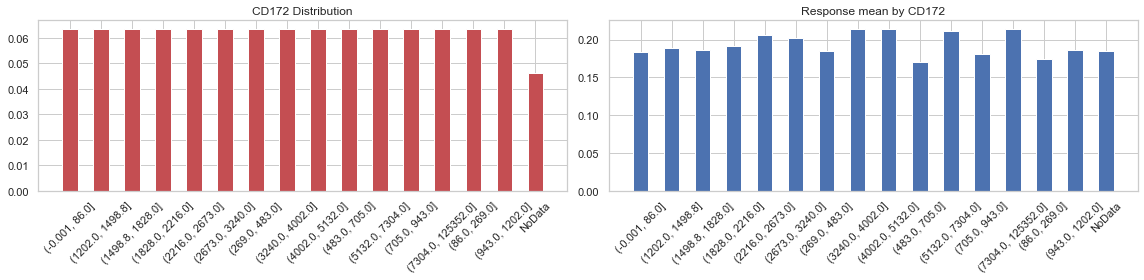

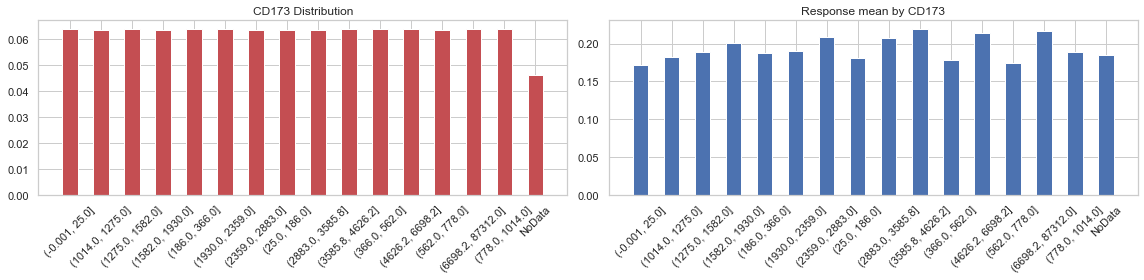

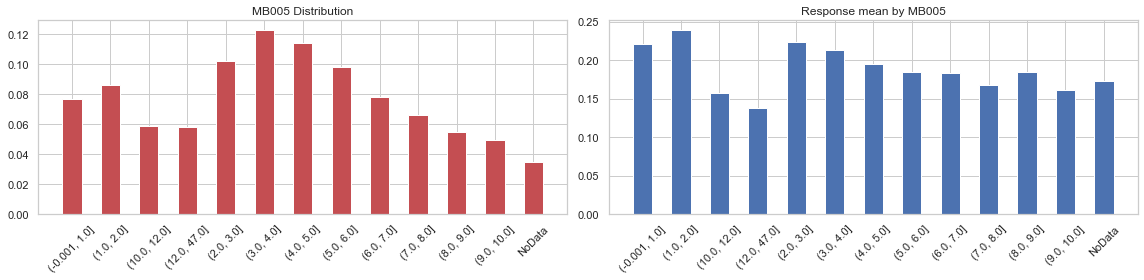

In [43]:
def plot_X_and_Y(var):
    
    z = df_bin.groupby(var + '_bin')['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var + '_bin']
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    plt.bar(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in features:
    plot_X_and_Y(i)  
    

## Obervations:

From the above graphs, the following variables seem to be not important, as they do not have a pattern or a trend, or a  curve on the '% Y by x' graph: 
1. `AP002`

### d. I will try to look at the distributions of the data, and the `% Y by X` which is the `mean` column for all the Categorical columns here.
#### This will help identify if mean or median is a better imputation for NA's and also help bin better manually.
#### Also, this will help in feature selection moving forward.

The 'mean' column represents the '% Y by X'.

In [44]:
features_2 = ['AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009',
       'CR009', 'MB007', 'Loan_app_day_name', 'Loan_app_month', 'Loan_app_time',
       'Loan_app_day'
           ]

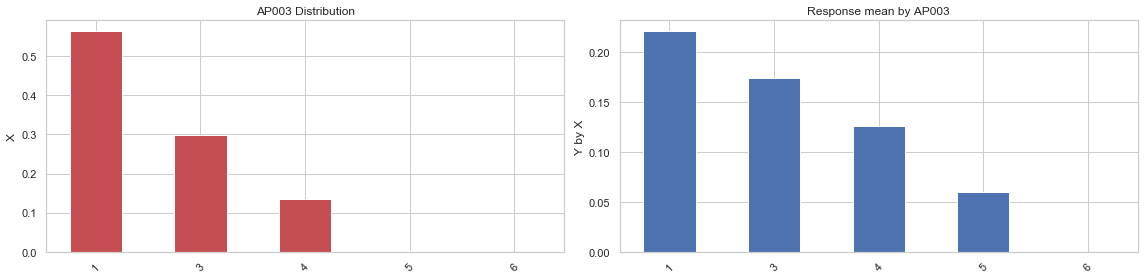

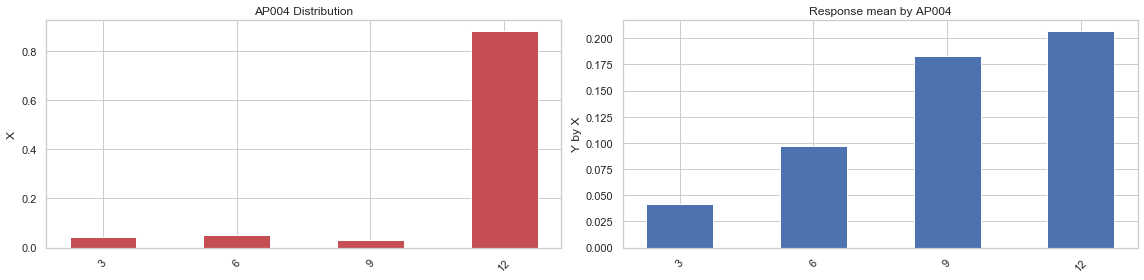

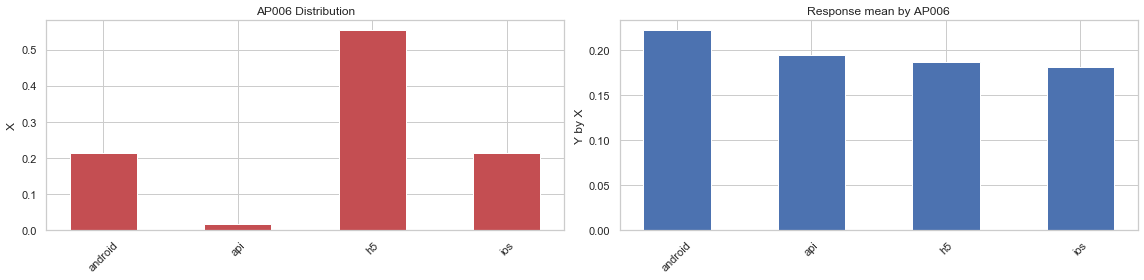

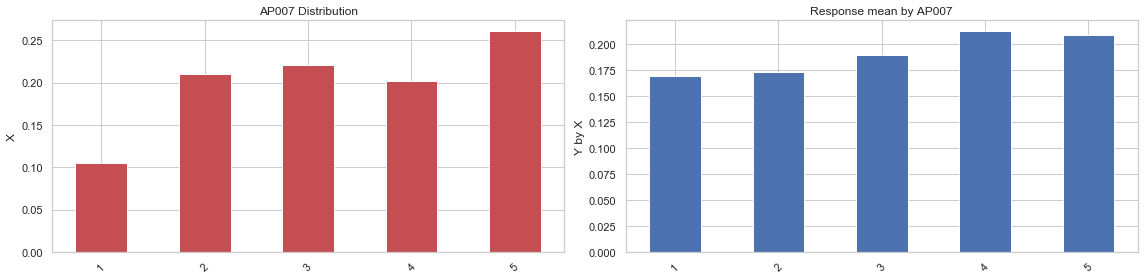

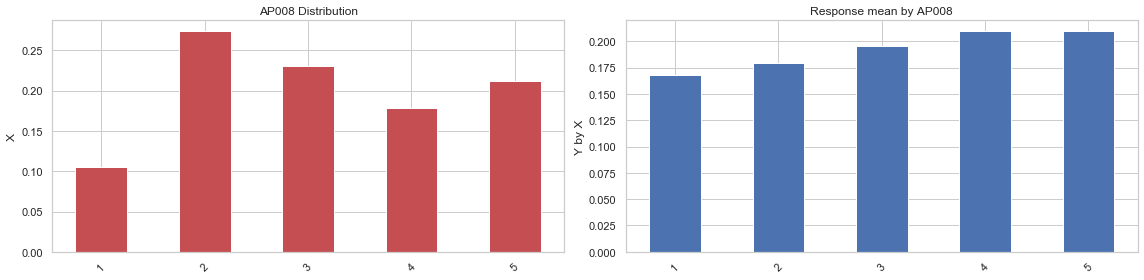

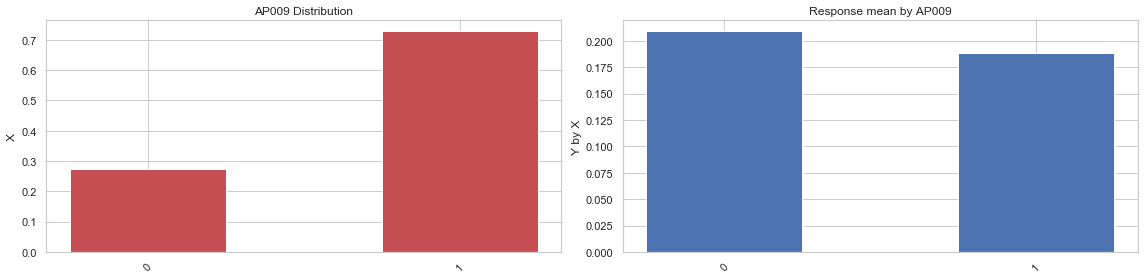

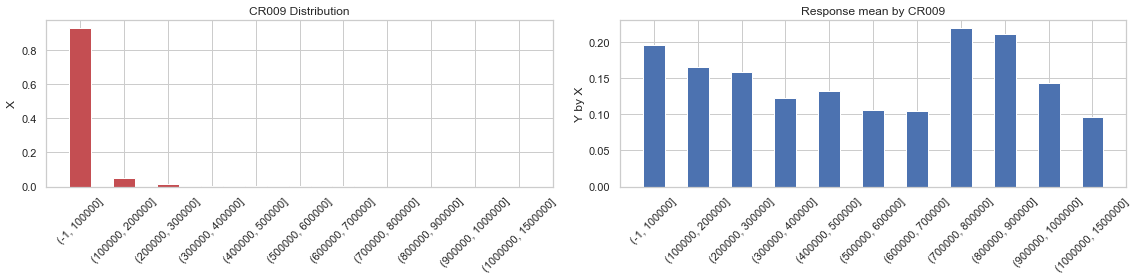

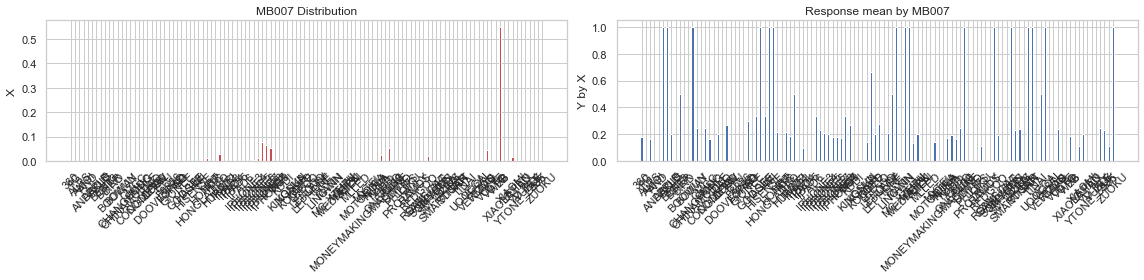

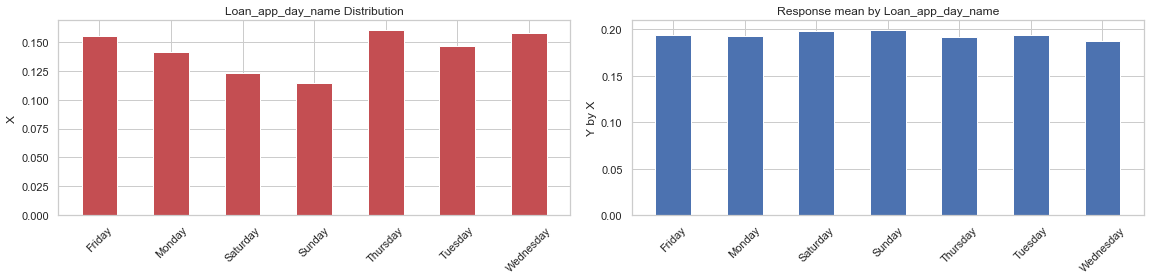

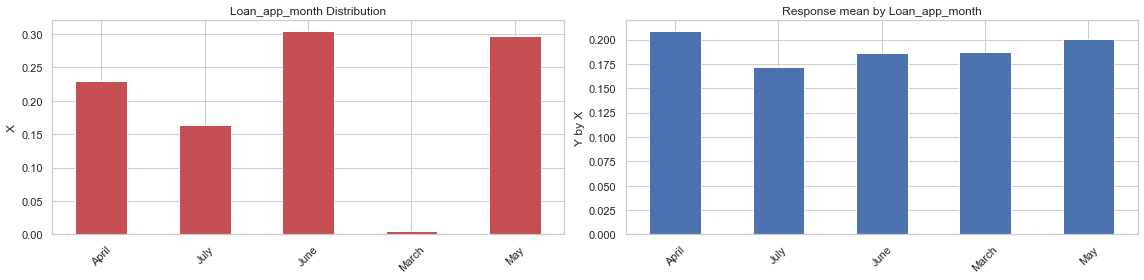

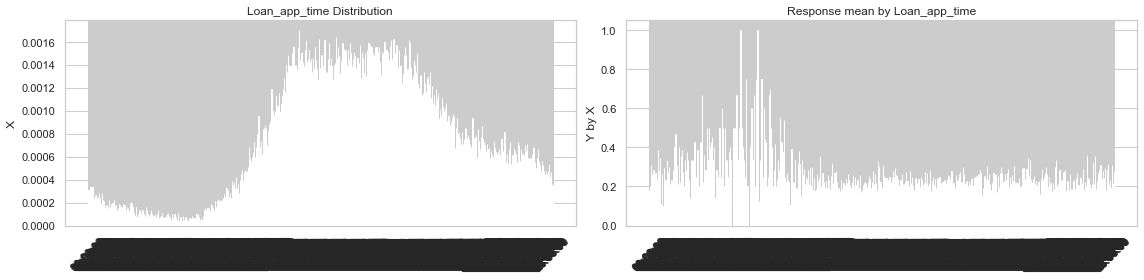

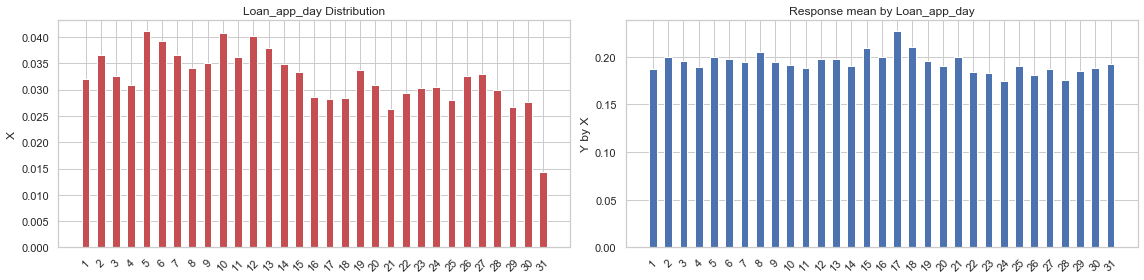

In [45]:
def plot_X_and_Y_cat(var):
    
    z = df_bin.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    plt.bar(ind, y_mean, width, color='b')
    plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()


for i in features_2:
    plot_X_and_Y_cat(i)  
    

## Obervations:

From the above graphs, the following variables seem to be not important, as they do not have a pattern or a trend, or a  curve on the '% Y by x' graph: 
1. `Loan_app_day_name`

## The EDA and the business insights of the top 15 variables have been done below later

# 3. Dummy coding the categorical variables, including the raw as well as the BINNED ones

This is essential as the model cannot read the categorical variables directly.

In [46]:
#df['AP003'].value_counts(dropna=False)
#df['AP004'].value_counts(dropna=False)
#df['AP006'].value_counts(dropna=False)
#df['AP007'].value_counts(dropna=False)
#df['AP008'].value_counts(dropna=False)
#df['AP009'].value_counts(dropna=False)
#df['CR009'].value_counts(dropna=False)
#df['MB007'].value_counts(dropna=False)
#df['Loan_app_month'].value_counts(dropna=False)
#df['Loan_app_day'].value_counts(dropna=False)

In [47]:
df.dtypes

loan_default          int64
AP001                 int64
AP002                 int64
AP003                 int64
AP004                 int64
                      ...  
MB007                object
Loan_app_day_name    object
Loan_app_month       object
Loan_app_time        object
Loan_app_day         object
Length: 76, dtype: object

In [48]:
# function to label encode all the object type variables
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [49]:
#passing the dataframe 'data' to label Encode the object variables
df = create_dummies(df)

AP006 encoded
CR009 encoded
MB007 encoded
Loan_app_day_name encoded
Loan_app_month encoded
Loan_app_time encoded
Loan_app_day encoded


# 4. Feature Selection

### Use the non-binned data, where NA's were filled with Iterative Imputer Median

## Using the median imputed values from the Iterative Imputer

In [50]:
# Over write the NA value columns
df[features_nan] = imputed_data_median

In [51]:
df.head()

,loan_default,AP001,AP002,AP003,AP004,AP006,AP007,AP008,AP009,TD001,...,CD169,CD170,CD172,CD173,MB005,MB007,Loan_app_day_name,Loan_app_month,Loan_app_time,Loan_app_day
0,1,31,2,1,12,3,3,3,1,1,...,1449,1449,2249,2249,7,45,4,1,620,5
1,0,27,1,1,12,2,5,4,0,2,...,1088,931,1674,1438,5,101,4,0,770,5
2,0,33,1,4,12,2,4,2,0,2,...,33,0,143,110,8,101,2,1,850,0
3,0,34,2,4,12,0,5,5,0,0,...,0,0,0,0,10,75,0,1,609,6
4,0,47,2,1,12,2,4,4,1,2,...,1093,921,1712,1454,9,101,4,1,876,5


In [52]:
df.isnull().sum().sum()

0

### Build an initial logistic regression model to see Feature Importance.

The Logistic Regression and RFE - Recursive Feature Elimination are handy for this purpose.

In [53]:
# ind_var is our independent variables and tar_var is the target dependent variable
ind_var = df.drop(['loan_default'], axis=1)
tar_var = df['loan_default']

### Considering `40` features

In [ ]:
model_0 = LogisticRegression()
rfe = RFE(model_0, 40)
fit = rfe.fit(ind_var, tar_var)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
feature_selected = fit.support_.tolist()
feature_ranking = fit.ranking_.tolist()

In [ ]:
column_names = df.columns.tolist()
column_names.remove('loan_default')   
## dropping this as this is target variable and not a regressor

In [ ]:
feature_importance_df = pd.DataFrame(
    {"column_names" : column_names,
     "feature_selected": feature_selected,
     "feature_ranking" : feature_ranking
     })

In [ ]:
feature_importance_df.sort_values(by = 'feature_ranking', inplace = True)

In [ ]:
top_40_features = feature_importance_df['column_names'].head(40)

In [ ]:
top_40_features

### Considering `20` features

In [ ]:
model_2 = LogisticRegression()
rfe = RFE(model_2, 20)
fit = rfe.fit(ind_var, tar_var)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
feature_selected = fit.support_.tolist()
feature_ranking = fit.ranking_.tolist()

In [ ]:
column_names = df.columns.tolist()
column_names.remove('loan_default')   
## dropping this as this is target variable and not a regressor

In [ ]:
feature_importance_df = pd.DataFrame(
    {"column_names" : column_names,
     "feature_selected": feature_selected,
     "feature_ranking" : feature_ranking
     })

In [ ]:
top_20_features = feature_importance_df['column_names'].head(20)

In [ ]:
top_20_features

# 5. EDA and Business Insights of most important variables

In [ ]:
def plot_X_Y(var):
    
    z = df.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    plt.bar(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()

### `AP001`, `Age`

In [ ]:
plot_X_Y('AP001')  

#### Business insight: 

It seems that most respondents are in their late to mid twenties (though the tail extends to the mid-fifties). 

Based on the second % of Y by X plot, there seems to be a marginally more pronounced rate of mortgage default with individuals in their early twenties, with the rate of default dropping in small numbers with older age. 

### `AP002`, `Gender`

In [ ]:
plot_X_Y('AP002')  

#### Business insight: 

Based on the first chart above, it seems that most respondents (>70%) are male (assuming that a value of "1" corresponds to male). 

Based on the second % of Y by X plot, there seems to be a marginally higher rate of mortgage default within the male segment, but the two genders do not meaningfully differ.

### `AP003`,`Education`

In [ ]:
print(df.AP003.value_counts())
plot_X_Y('AP003')  

#### Business insight: 

Based on the first chart above, it seems that most of the respondents in the dataset do not have an elevated level of higher education. 

Based on the second % of Y by X plot, there seems to be a decrease in the rate of mortgage default as the level of education increases (which makes sense, as more educated individuals presumably bring in higher salaries and are more financially stable).

### `AP004`, `Loan Term`

In [ ]:
print(df.AP004.value_counts())
plot_X_Y('AP004')  

#### Business insight: 

Based on the first chart above, it seems that most of the respondents in the dataset have a longer loan term of 12 years. 

Based on the second % of Y by X plot, there seems to be an increase in the rate of mortgage default as the length of the loan term increases (which makes sense, individuals more confident in their financial resources would presumably request a shorter loan term as they anticipate being able to pay it off more quickly).

### `CR009`, `Loan Amount`

In [ ]:
print(df.CR009.value_counts())
plot_X_Y('CR009')  

#### Business insight: 

Based on the first chart above, it seems that most of the respondents in the dataset have a loan amount less than 100,000 dollars in value. 

Based on the second % of Y by X plot, there seems to be an especially pronounced rate of mortgage default in the 700,000 to 800,000 dollar segment (above 25%!). 

There seems to be a polarization of sorts- lower total loan amounts (e.g. The segments 200,000 dollars and below) and higher total loan amounts (from the segments in the 700,000 dollars and above range) have a higher rate of default than loan amounts in the middle of the value spectrum.

### `AP006`, `OS Type`

In [ ]:
print(df.AP006.value_counts())
plot_X_Y('AP006')  

#### Business insight: 

As per data, "0" corresponds to "iOS", "1" corresponds to "api", "2" corresponds to "h5", and "3" corresponds to "android". 

Based on the first chart above, it seems that most (>50%) of the respondents in the dataset have a phone operating system of "h5". 

Based on the second % of Y by X plot, the rate of default does not meaningfully differ between operating systems (though the rate of default for Android is incrementally higher in an extremely marginal manner).

### `AP007`, `Application City`

In [ ]:
print(df.AP007.value_counts())
plot_X_Y('AP007')  

#### Business insight: 

Based on the first chart above, it seems that the respondents are almost evenly distributed between cities, but less in city 1.

Based on the second % of Y by X plot, the rate of default does not meaningfully differ between cities though the rate of default for city 4 is higher .

### `CR015`, `Monthly Credit Card MOB Max`

In [ ]:
print(df.CR015.value_counts())
plot_X_Y('CR015')  

### Business insight: 

Based on the first chart above, it seems that most respondents (>75%) have monthly credit card MOB maxes in the range of 5 to 6. 

Based on the second % of Y by X plot, the rate of default does not significantly differ between the monthly maxes, but the value of 3 seems to have the highest default rate (~25%).

### `MB005`, `Years phone is active`

In [ ]:
print(df.MB005.value_counts())
plot_X_Y('MB005')  

### Business insight: 

Based on the first chart above, it seems that most respondents have phones that have been active for around 4-5 years. 

Based on the second % of Y by X plot, the rate of default appears to decrease with the years of service (though oddly seems to spike at the right-most value in the low 20-year range). This makes sense, for more financially conservative and frugal individuals (hence more financially stable and capable of paying mortgage obligations) may use their phones for longer periods of time.

### `CR018`, `Score of Debit Card Utility Amount`

In [ ]:
print(df.CR018.value_counts())
plot_X_Y('CR018')  

#### Business insight: 

Based on the first chart above, it seems that most respondents are pretty distibuted weirdly among the score range. It rises, falls, and then rises sharply again.

Based on the second % of Y by X plot, the rate of default does not significantly or meaningfully differ between values, with mortgage default rates in each segment hovering around the 20% range.

### `CR017`, `Score of Debit Card Total Amount`

In [ ]:
print(df.CR017.value_counts())
plot_X_Y('CR017')  

#### Business insight: 

Based on the first chart above, most respondents are distibuted towards the the end of the score range (with 25% tied to the maximum value of 8). 

Based on the second % of Y by X plot, the rate of default decreases slightly as scores increase.

### `CR019`, `Single Debit Card Limit Score`

In [ ]:
print(df.CR019.value_counts())
plot_X_Y('CR019')  

#### Business insight: 

Based on the first chart above, most respondents are concentrated either around the score value of 3 or the score value of 11. 

Based on the second % of Y by X plot, the rate of default does not meaningfully differ between scores for debit card limits.

### `CR005`, `Count of Query times for last 2 months`

In [ ]:
print(df.CR019.value_counts())
plot_X_Y('CR019')  

#### Business insight: 

Based on the first chart above, most respondents (around 60-70%) have had very few (less than 6-7) queries in the past two months. 

Based on the second % of Y by X plot, the rate of default does not significantly differ between the count of queries, which is surprising (given that one would think individuals with a higher count of queries from banks would be more financially instable and have a higher rate of mortgage default).

### `CD106`, `Count of Abnormal Calls in Last 3 Months`

In [ ]:
print(df.CD106.value_counts())
plot_X_Y('CD106')  

#### Business insight: 

Not much good insight can be derived from the first chart above.

But based on the second % of Y by X plot, the rate of default increases as the count of abnormal calls for the past 3 months increases (which makes sense, as relevant stakeholders may call the individual in question outside of regular call parameters to discuss non-payment of their mortgage obligations).

### `CD121`, `Count of Distinct Calls in Last 3 months`

In [ ]:
print(df.CD121.value_counts())
plot_X_Y('CD121')  

#### Business insight: 

Not much insight can be derived from the first chart above. Although I see there is a very sharp spike at 144.

But based on the second % of Y by X plot, the rate of default increases as the count of distinct calls for the past 3 months increases (which makes sense, as other stakeholders such as creditors may call the individual in question to discuss non-payment of their mortgage obligations).

### `TD015`, `Count of Query with Bank in Last 6 months`

In [ ]:
print(df.TD015.value_counts())
plot_X_Y('TD015')  

#### Business Insight:

Based on the first chart above, most respondents (around 80%) have had very few (less than 2) queries with the bank directly in the past 6 months.

Based on the second % of Y by X plot, the rate of default does not significantly differ between the count of queries, which is surprising (given that one would think individuals with a higher count of queries from banks would be more financially instable and have a higher rate of mortgage default). However, towards the right, there is a sharp tail which only includes 1 defaulter, so we can exclude that.

### `TD005`, `Count of Query in Last 1 month P2P`

In [ ]:
print(df.TD005.value_counts())
plot_X_Y('TD005')  

#### Business Insight:

Based on the first chart above, most respondents (around60%) have had very few (less than 4) P2P queries in the past 1 month.

Based on the second % of Y by X plot, the rate of default does increase with the increase in the number of count of calls. 

# 6. Build Logistic Regression Model

I will do the train test split and build a model

#### The best Lift I get is if I use 40 variables to build my model.

### TRAIN TEST Split

In [ ]:
#features = ['AP001', 'AP002','AP003','AP004','AP007','AP008','AP009','TD001','TD006','TD009','TD013',
#            'CR004','CR005','CR015','CR017','CR018','PA023','PA029','PA030','CD008','CD101',
#            'CD113','CD117','CD132','CD137','CD152','CD162','CD172','CD173','MB005']

X = df[top_40_features]
y = df['loan_default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

### Build Model

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train, y_train)

In [ ]:
pred_loan_def = model1.predict(X_test)

In [ ]:
predictions = np.where(pred_loan_def>np.mean(pred_loan_def),1,0)

In [ ]:
print(accuracy_score(y_test, predictions) * 100)

In [ ]:
confusion_matrix = confusion_matrix(y_test, pred_loan_def)
print(confusion_matrix)

# 7. Gains Tables, Lift, ROC

In [ ]:
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = y_test
df_prep['pred'] = predictions
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

In [ ]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

In [ ]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

In [ ]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

In [ ]:
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = y_test
    df_prep['pred'] = pred_loan_def
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(y_test, pred_loan_def)
gains
gains['lift'].plot.line()

### Cumulative Lift

In [ ]:
gains['lift'].plot.line()

In [ ]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

### Komogorov-Smirnov (K-S)

In [ ]:
gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()

In [ ]:
gains['K_S'].max()

### ROC

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

#y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(y_test, pred_loan_def)
roc_auc_value

In [ ]:
fpr, tpr, _ = roc_curve(y_test, pred_loan_def)
[fpr,tpr]

In [ ]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# Future Evaluation

Study the box plots to understand better the distribution and spread of the numeric variables - counts.

In [ ]:
warnings.simplefilter('ignore')
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(8,4, figsize=(40,40))               
plt.suptitle("Distribution of various factors", fontsize=40)
sns.boxplot(df['CD008'], ax = ax[0][0]) 
sns.boxplot(df['CD018'], ax = ax[0][1]) 
sns.boxplot(df['CD071'], ax = ax[0][2]) 
sns.boxplot(df['CD072'], ax = ax[0][3]) 
sns.boxplot(df['CD088'], ax = ax[1][0]) 
sns.boxplot(df['CD100'], ax = ax[1][1])  
sns.boxplot(df['CD101'], ax = ax[1][2]) 
sns.boxplot(df['CD106'], ax = ax[1][3]) 
sns.boxplot(df['CD107'], ax = ax[2][0])  
sns.boxplot(df['CD108'], ax = ax[2][1])
sns.boxplot(df['CD113'], ax = ax[2][2])
sns.boxplot(df['CD114'], ax = ax[2][3])
sns.boxplot(df['CD115'], ax = ax[2][0])  
sns.boxplot(df['CD117'], ax = ax[2][1])
sns.boxplot(df['CD118'], ax = ax[2][2])
sns.boxplot(df['CD120'], ax = ax[2][3])
sns.boxplot(df['CD121'], ax = ax[3][0])  
sns.boxplot(df['CD130'], ax = ax[3][1])
sns.boxplot(df['CD131'], ax = ax[3][2])
sns.boxplot(df['CD132'], ax = ax[3][3])
sns.boxplot(df['CD133'], ax = ax[4][0]) 
sns.boxplot(df['CD135'], ax = ax[4][1]) 
sns.boxplot(df['CD136'], ax = ax[4][2]) 
sns.boxplot(df['CD137'], ax = ax[4][3]) 
sns.boxplot(df['CD152'], ax = ax[5][0]) 
sns.boxplot(df['CD153'], ax = ax[5][1])  
sns.boxplot(df['CD160'], ax = ax[5][2]) 
sns.boxplot(df['CD162'], ax = ax[5][3]) 
sns.boxplot(df['CD164'], ax = ax[6][0])  
sns.boxplot(df['CD166'], ax = ax[6][1])
sns.boxplot(df['CD167'], ax = ax[6][2])
sns.boxplot(df['CD169'], ax = ax[6][3])
sns.boxplot(df['CD170'], ax = ax[7][0])
sns.boxplot(df['CD172'], ax = ax[7][1])
sns.boxplot(df['CD173'], ax = ax[7][2])
plt.show()

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
print(cm)

print(accuracy_score(y_test, rf_pred)*100)
